In [1]:
import pandas as pd
import numpy as np
from datetime import date
import datetime 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\Dell\Documents\python\superstore_sales.xlsx")
with pd.option_context('display.max_columns',None):
    display(df.head())

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [3]:
# EXTRACTING MONTHLY SALES DATA

monthly_sales = df.copy()
monthly_sales = monthly_sales[['region','order_date','sales','year']]

def extract_month(x):
    month = x.month
    return month

monthly_sales['month'] = monthly_sales['order_date'].apply(extract_month)



def extract_month_year(x):
    month_year = str(x.month) + '-' + str(x.year)
    return month_year

monthly_sales['month_year'] = monthly_sales['order_date'].apply(extract_month_year)

monthly_sales = monthly_sales.groupby(['year','month','month_year'])['sales'].sum()
monthly_sales = pd.DataFrame(monthly_sales).reset_index()


monthly_sales.sort_values(['year','month'])
monthly_sales['sales'] = round(monthly_sales['sales'],2 )
monthly_sales.drop(['year','month'],axis = 1,inplace = True)
monthly_sales['month_year'] = pd.to_datetime(monthly_sales['month_year'])
#monthly_sales.set_index('month_year',inplace = True)
monthly_sales
monthly_sales_regional = df[['region','order_date','sales','year']]
monthly_sales_regional['quarter'] = monthly_sales_regional['order_date'].apply(extract_month_year) 
monthly_sales_regional['month_year'] = pd.to_datetime(monthly_sales_regional['quarter'])
monthly_sales_regional = monthly_sales_regional.groupby(['region','quarter','month_year'])['sales'].sum()
monthly_sales_regional = pd.DataFrame(monthly_sales_regional).reset_index()
monthly_sales_regional

C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2675703683.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_sales_regional['quarter'] = monthly_sales_regional['order_date'].apply(extract_month_year)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2675703683.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_sales_regional['month_year'] = pd.to_datetime(monthly_sales_regional['quarter'])


,region,quarter,month_year,sales
0,Africa,1-2011,2011-01-01,11740.8990
1,Africa,1-2012,2012-01-01,6476.0130
2,Africa,1-2013,2013-01-01,11934.4890
3,Africa,1-2014,2014-01-01,14199.0360
4,Africa,10-2011,2011-10-01,7642.8030
...,...,...,...,...
618,West,8-2014,2014-08-01,24196.7580
619,West,9-2011,2011-09-01,14900.5370
620,West,9-2012,2012-09-01,13898.9240
621,West,9-2013,2013-09-01,23620.8765


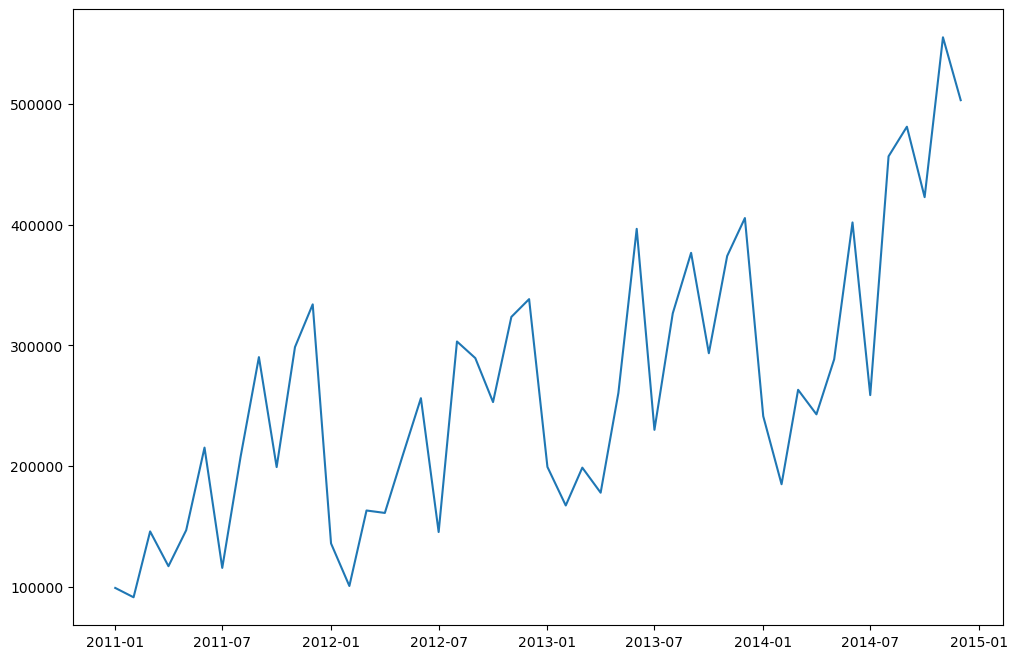

In [4]:
plt.figure(figsize=(12,8))
plt.plot(monthly_sales['month_year'],monthly_sales['sales'])

In [5]:
monthly_sales

,month_year,sales
0,2011-01-01,98898.49
1,2011-02-01,91152.16
2,2011-03-01,145729.37
3,2011-04-01,116915.76
4,2011-05-01,146747.84
5,2011-06-01,215207.38
6,2011-07-01,115510.42
7,2011-08-01,207581.49
8,2011-09-01,290214.46
9,2011-10-01,199071.26


In [6]:
monthly_sales_forecast = monthly_sales.copy()
monthly_sales_forecast['month'] = monthly_sales_forecast['month_year']
monthly_sales_forecast = monthly_sales_forecast[['month','sales']]
monthly_sales_forecast.set_index('month',inplace = True)
monthly_sales_forecast


,sales
month,
2011-01-01,98898.49
2011-02-01,91152.16
2011-03-01,145729.37
2011-04-01,116915.76
2011-05-01,146747.84
2011-06-01,215207.38
2011-07-01,115510.42
2011-08-01,207581.49
2011-09-01,290214.46


<AxesSubplot:xlabel='month'>

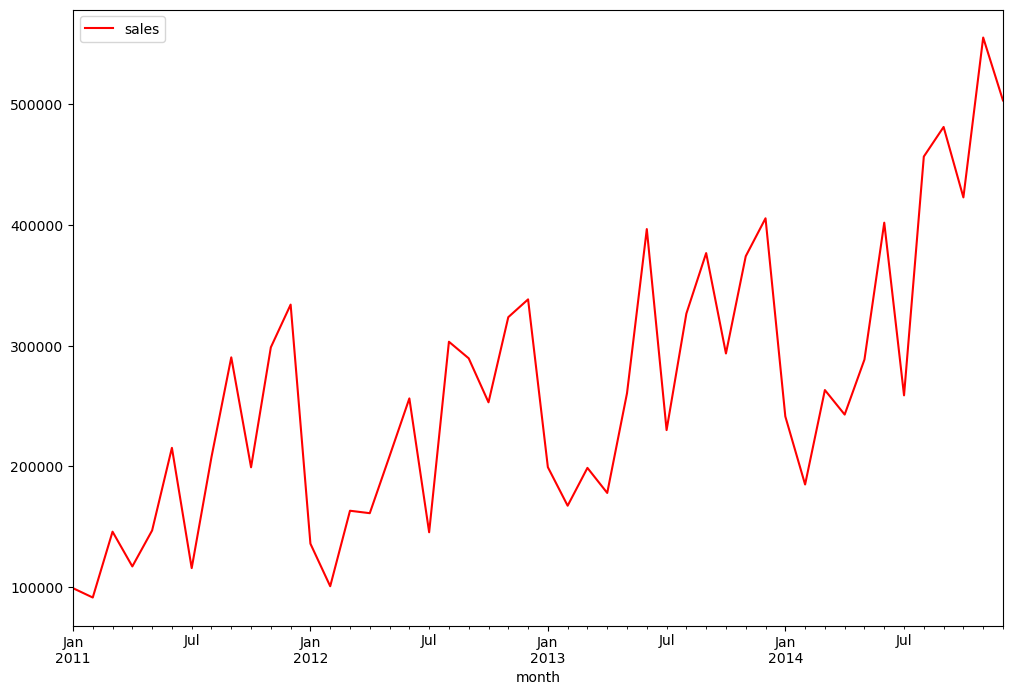

In [7]:
monthly_sales_forecast.plot(figsize = (12,8),c='r')

In [8]:
# testing data whether it is stationary or not through Dickey-Fuller test
#Ho = Data is not stationary; phi >=1
#Ha = Data is stationary phi < 1
# If the p-value is less than 0.05 then we can reject the null hypothesis else we can accept the same

from statsmodels.tsa.stattools import adfuller
test_result = adfuller(monthly_sales_forecast['sales'])
test_result

(0.6183321694337027,
 0.9880588766429963,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 937.6522356683946)

In [9]:
#Using Augumented Dickey-fuller test to test whether the data is stationary or not 
def ad_fuller_test(target):
    result = adfuller(target)
    labels = ['ADF TEST STATISTICS','p-value','#LAGS USED','NUMBER OF OBSERVATIONS USED']
    for value,label in zip(result,labels):
        print(label + ':' + str(round(value,4)))
    if result[1] <= 0.05:
        print('We have strong evidence against the null hypothesis and hence Data is Stationary')
    else:
        print('We have week evidence against the null hypothesis and hence Data is Not Stationary')
ad_fuller_test(monthly_sales_forecast['sales'])

ADF TEST STATISTICS:0.6183
p-value:0.9881
#LAGS USED:10
NUMBER OF OBSERVATIONS USED:37
We have week evidence against the null hypothesis and hence Data is Not Stationary


In [10]:
# DIFFERENCING TO MAKE THE TIME SERIES DATA STATIONARY

monthly_sales_forecast['first_difference'] = monthly_sales_forecast['sales']- monthly_sales_forecast['sales'].shift(1)
monthly_sales_forecast['seasonal_difference'] = monthly_sales_forecast['sales'] - monthly_sales_forecast['sales'].shift(12)
monthly_sales_forecast.dropna(inplace = True)
display(monthly_sales_forecast)

,sales,first_difference,seasonal_difference
month,,,
2012-01-01,135780.72,-198145.01,36882.23
2012-02-01,100510.22,-35270.50,9358.06
2012-03-01,163076.77,62566.55,17347.40
2012-04-01,161052.27,-2024.50,44136.51
2012-05-01,208364.89,47312.62,61617.05
2012-06-01,256175.70,47810.81,40968.32
2012-07-01,145236.79,-110938.91,29726.37
2012-08-01,303142.94,157906.15,95561.45
2012-09-01,289389.17,-13753.77,-825.29


In [11]:
# again performing the Augumented Dickey Fuller test
#Ho = Data is not stationary; phi >=1
#Ha = Data is stationary phi < 1
# If the p-value is less than 0.05 then we can reject the null hypothesis else we can accept the same

ad_fuller_test(monthly_sales_forecast['seasonal_difference'])

ADF TEST STATISTICS:-3.7203
p-value:0.0038
#LAGS USED:0
NUMBER OF OBSERVATIONS USED:35
We have strong evidence against the null hypothesis and hence Data is Stationary


<AxesSubplot:xlabel='month'>

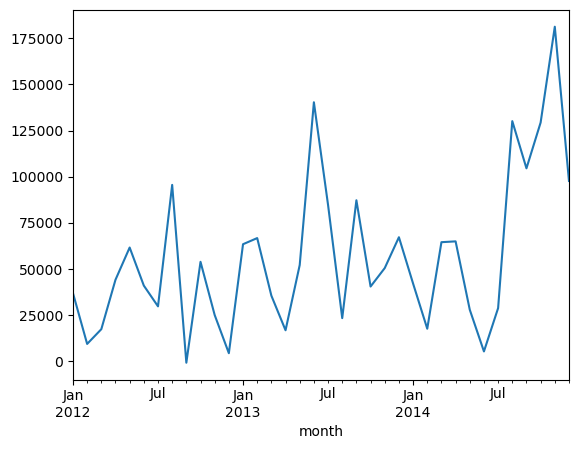

In [12]:
monthly_sales_forecast['seasonal_difference'].plot()

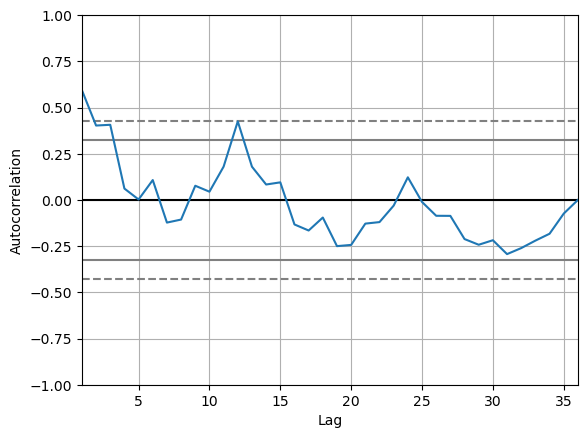

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

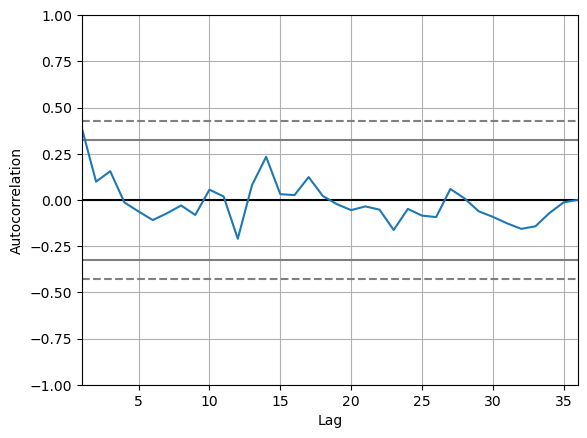

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(monthly_sales_forecast['sales'])
plt.show()
autocorrelation_plot(monthly_sales_forecast['seasonal_difference'])

Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags

In [14]:
df_forecast = monthly_sales.copy()
df_forecast
df_forecast['month_year'] = pd.to_datetime(df_forecast['month_year'])
df_forecast.set_index('month_year',inplace = True)
df_forecast

,sales
month_year,
2011-01-01,98898.49
2011-02-01,91152.16
2011-03-01,145729.37
2011-04-01,116915.76
2011-05-01,146747.84
2011-06-01,215207.38
2011-07-01,115510.42
2011-08-01,207581.49
2011-09-01,290214.46


In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


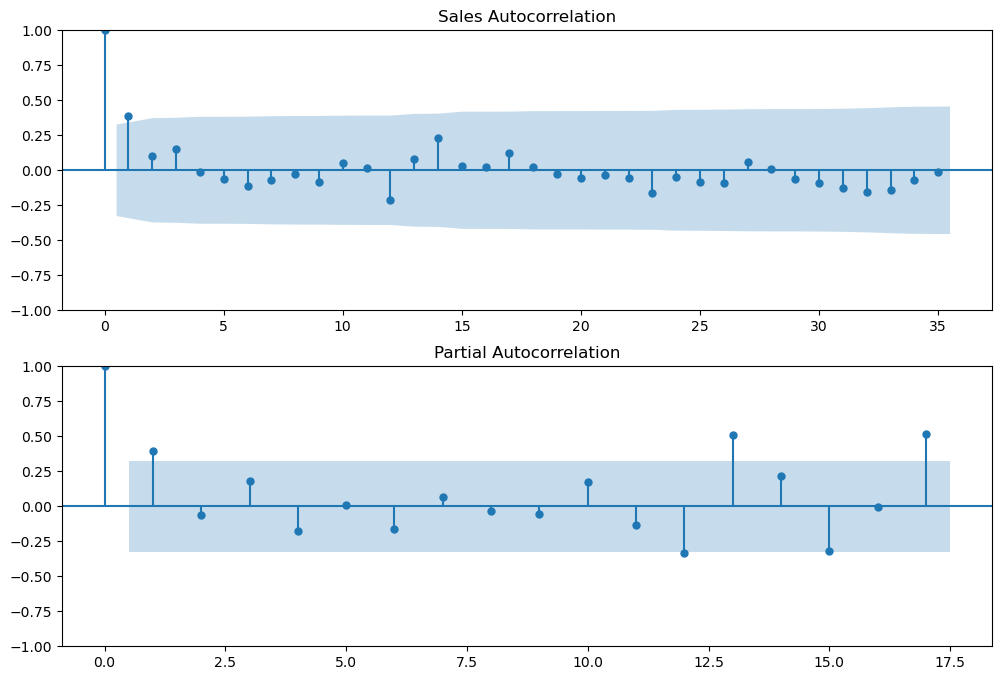

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(monthly_sales_forecast['seasonal_difference'],lags=35,ax=ax1)
plt.title('Sales Autocorrelation')
ax2 = fig.add_subplot(212)
fig = plot_pacf(monthly_sales_forecast['seasonal_difference'],lags=17,ax=ax2)
plt.show()

p = 1,q=0/1,d=1(since we have shifted the differencing  only once)
we will be using SARIMAX

In [17]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df_forecast['sales'],order = (1,1,1),seasonal_order = (1,1,1,12))
result = model.fit()
print(result)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<AxesSubplot:xlabel='month_year'>

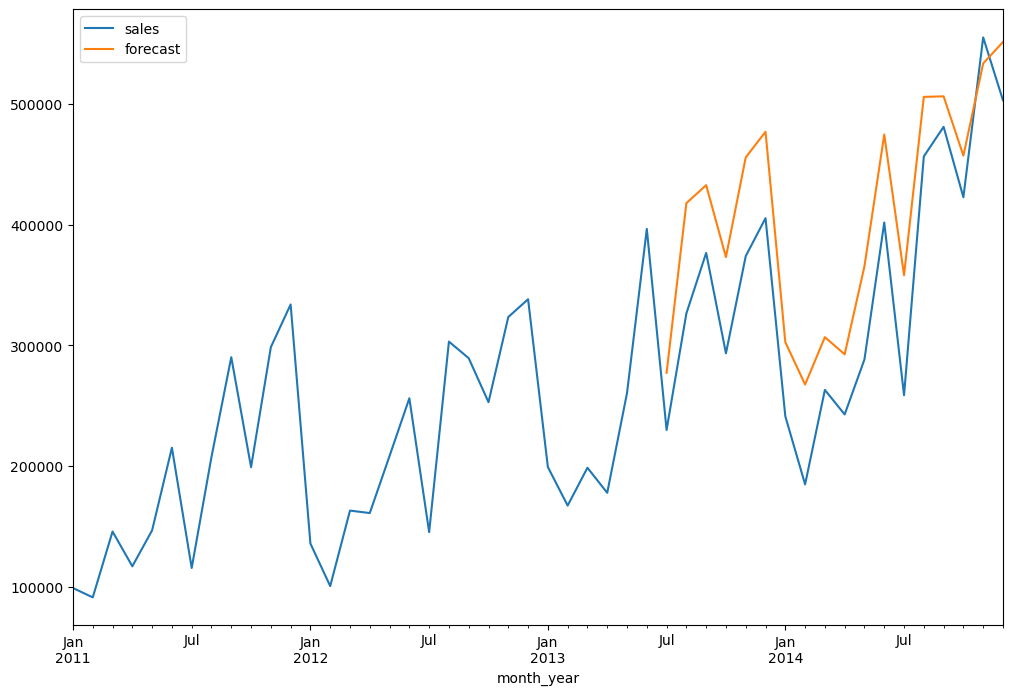

In [18]:
df_forecast['forecast'] = result.predict(start = 30, end = 47, dynamic = True)
df_forecast[['sales','forecast']].plot(figsize = (12,8)) 

In [19]:
#importing DATEOFFSET to add future dates for values
from pandas.tseries.offsets import DateOffset
future_dates = [df_forecast.index[-1] + DateOffset(months = x) for x in range(1,13)]
future_dates
df_forecast.index[-1]

Timestamp('2014-12-01 00:00:00')

In [20]:
df_forecast.index = list(df_forecast.index)
indices1 = list(df_forecast.index) + future_dates
indices1
df_predicted = pd.DataFrame(index = future_dates)
df_predicted['sales'] =  result.predict(start = '2014-12-01', end = '2015-12-01', dynamic = True)
df_predicted['sales'] = df_predicted['sales'].round(2) 
df_predicted

,sales
2015-01-01,393988.87
2015-02-01,332906.39
2015-03-01,387197.23
2015-04-01,358341.24
2015-05-01,410806.96
2015-06-01,531701.49
2015-07-01,375702.73
2015-08-01,538954.17
2015-09-01,573590.35
2015-10-01,503457.67


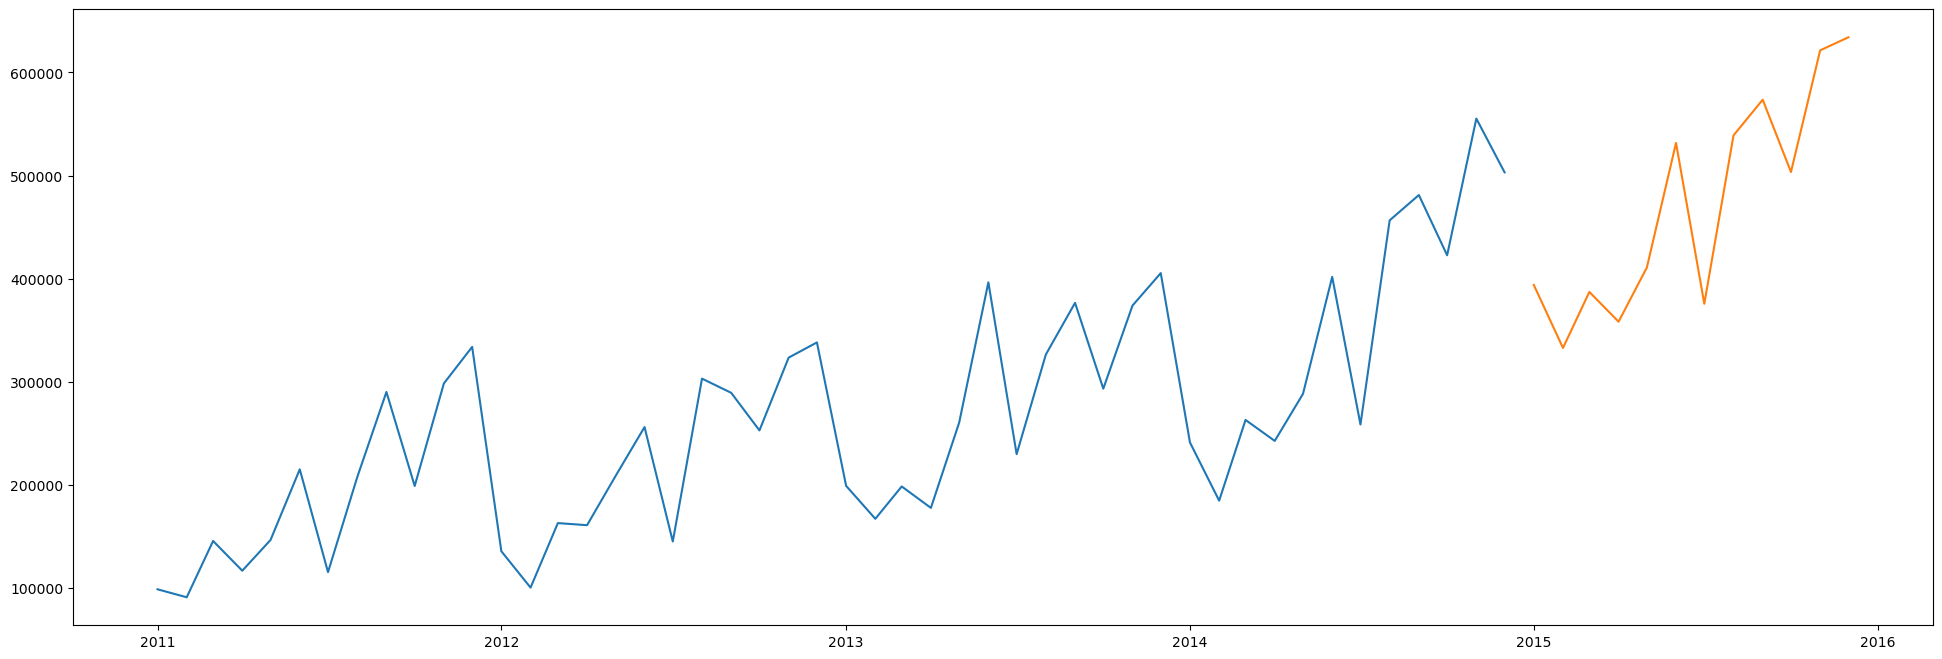

In [21]:
plt.figure(figsize=(24,8))
plt.plot(df_forecast.index,df_forecast['sales'])
plt.plot(df_predicted.index,df_predicted['sales'])
plt.show()

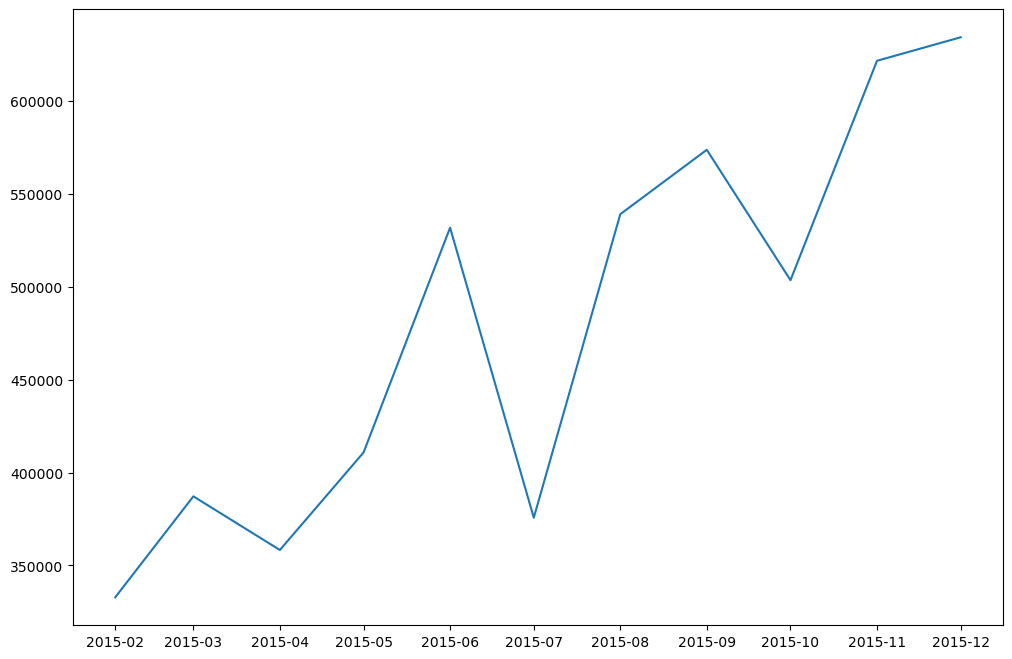

In [22]:
plt.figure(figsize = (12,8))
plt.plot(df_predicted.index[1:],df_predicted['sales'].iloc[1:])

In [23]:
region = df[['region','order_date','sales']]
region['month_year'] = region['order_date'].apply(extract_month_year)
region['month_year'] = pd.to_datetime(region['month_year'])
region = region.groupby(by = ['region','month_year'])['sales'].sum()
region = pd.DataFrame(region).reset_index()

Africa = region[region['region']=='Africa']
Africa.drop('region',axis = 1,inplace = True)
Africa.set_index('month_year',inplace = True)
Africa.name = 'Africa'
#Canadian = region[region['region']=='Canada']
#Canadian.drop('region',axis = 1,inplace = True)
#Canadian.set_index('month_year',inplace = True)
#Canadian.name = 'Canadian'
Caribbean = region[region['region']=='Caribbean']
Caribbean.drop('region',axis = 1,inplace = True)
Caribbean.set_index('month_year',inplace = True)
Caribbean.name = 'Caribbean'
Central = region[region['region']=='Central']
Central.drop('region',axis = 1,inplace = True)
Central.set_index('month_year',inplace = True)
Central.name = 'Central'
Central_Asia = region[region['region']=='Central Asia']
Central_Asia.drop('region',axis = 1,inplace = True)
Central_Asia.set_index('month_year',inplace = True)
Central_Asia.name = 'Central_Asia'
EMEA = region[region['region']=='EMEA']
EMEA.drop('region',axis = 1,inplace = True)
EMEA.set_index('month_year',inplace = True)
EMEA.name = 'EMEA'
East = region[region['region']=='East']
East.drop('region',axis = 1,inplace = True)
East.set_index('month_year',inplace = True)
East.name = 'East'
North = region[region['region']=='North']
North.drop('region',axis = 1,inplace = True)
North.set_index('month_year',inplace = True)
North.name = 'North'
North_Asia = region[region['region']=='North Asia']
North_Asia.drop('region',axis = 1,inplace = True)
North_Asia.set_index('month_year',inplace = True)
North_Asia.name = 'North_Asia'
Oceania = region[region['region']=='Oceania']
Oceania.drop('region',axis = 1,inplace = True)
Oceania.set_index('month_year',inplace = True)
Oceania.name = 'Oceania'
South = region[region['region']=='South']
South.drop('region',axis = 1,inplace = True)
South.set_index('month_year',inplace = True)
South.name = 'South'
Southeast_Asia = region[region['region']=='Southeast Asia']
Southeast_Asia.drop('region',axis = 1,inplace = True)
Southeast_Asia.set_index('month_year',inplace = True)
Southeast_Asia.name = 'Southeast_Asia'
West =  region[region['region']=='West']
West.drop('region',axis = 1,inplace = True)
West.set_index('month_year',inplace = True)
West.name = 'West'
#africa
#region['region'].unique()
region
West

C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2328062488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region['month_year'] = region['order_date'].apply(extract_month_year)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2328062488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region['month_year'] = pd.to_datetime(region['month_year'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2328062488.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



,sales
month_year,
2011-01-01,2648.0570
2011-02-01,1348.6220
2011-03-01,11008.8980
2011-04-01,9343.4870
2011-05-01,6570.4380
2011-06-01,9629.4220
2011-07-01,21808.5530
2011-08-01,13248.2310
2011-09-01,14900.5370


In [24]:
list_of_regions = list(region['region'].unique())
print(list_of_regions)
list_of_regions = [Africa, Caribbean, Central, Central_Asia, EMEA, East, North, North_Asia, Oceania, South, Southeast_Asia, West]

['Africa', 'Canada', 'Caribbean', 'Central', 'Central Asia', 'EMEA', 'East', 'North', 'North Asia', 'Oceania', 'South', 'Southeast Asia', 'West']


In [25]:
for area in list_of_regions:
    print(area.name)

Africa
Caribbean
Central
Central_Asia
EMEA
East
North
North_Asia
Oceania
South
Southeast_Asia
West


In [26]:
for area in list_of_regions:
    print(area.name,':',len(area)) 

Africa : 48
Caribbean : 48
Central : 48
Central_Asia : 48
EMEA : 48
East : 48
North : 48
North_Asia : 48
Oceania : 48
South : 48
Southeast_Asia : 48
West : 48


In [27]:
#canada_row = [np.nan,np.nan]
#srs  = pd.DataFrame(canada_row)
#srs = srs.transpose()
#srs.index = [datetime.datetime.strptime('2012-01-01','%Y-%m-%d')]
#srs
#Canadian = pd.concat([Canadian,srs])
#Canadian = Canadian.dropna(axis = 1, how = 'all' )
#Canadian.iloc[:,:]
#Canadian.sort_index(inplace = True)

In [28]:
#lst_sales = Canadian['sales'].tolist()
#plt.boxplot(lst_sales,labels= ['sales'])
#plt.title('Box Plot')

In [29]:
#x_mean = round(Canadian[(Canadian.index <= '2012-03-01') & (Canadian.index >= '2011-10-01')].dropna()['sales'].mean(),2)
#Canadian['sales'].fillna(x_mean,inplace = True)
#len(Canadian)

In [30]:
#seasonality of 12 months
def seasonal_sales(df):
    srs = pd.Series()
    srs = df['sales'] - df['sales'].shift(12)
    return srs


In [31]:
for area in list_of_regions:
    area['seasonal_difference'] = seasonal_sales(area)

C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\3164340830.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  srs = pd.Series()
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\1265353026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area['seasonal_difference'] = seasonal_sales(area)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\3164340830.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  srs = pd.Series()
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\1265353026.py:2: SettingWithCopyWarning: 
A value 

In [32]:
West

,sales,seasonal_difference
month_year,,
2011-01-01,2648.0570,NaN
2011-02-01,1348.6220,NaN
2011-03-01,11008.8980,NaN
2011-04-01,9343.4870,NaN
2011-05-01,6570.4380,NaN
2011-06-01,9629.4220,NaN
2011-07-01,21808.5530,NaN
2011-08-01,13248.2310,NaN
2011-09-01,14900.5370,NaN


In [33]:
#adfuller test for seasonality of 12 months
def ad_fuller_test_region(target):
    target['seasonal_difference'] = target['sales'] - target['sales'].shift(12)
    result = adfuller(target['seasonal_difference'].loc['2012-01-01':])
    labels = ['ADF TEST STATISTICS','p-value','#LAGS USED','NUMBER OF OBSERVATIONS USED']
    if result[1] <= 0.05:
        return target.name
    else:
        return None


In [34]:
lst = []
for area in list_of_regions:
    l = [ad_fuller_test_region(area)]
    if l!=[None]:
        lst = lst + l

print('regions having data with a seasonality of 12 months: ',lst)
len(lst)

regions having data with a seasonality of 12 months:  ['Africa', 'Central', 'Central_Asia', 'East', 'North_Asia', 'Oceania', 'South', 'Southeast_Asia', 'West']


C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2826596176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['seasonal_difference'] = target['sales'] - target['sales'].shift(12)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2826596176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['seasonal_difference'] = target['sales'] - target['sales'].shift(12)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2826596176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

9

In [35]:
lst2 = []
for i in list_of_regions:
    if i.name not in lst:
        lst2 = lst2 + [i.name]
print('regions not having seasonality of 12 months',lst2)
lst2 = [Caribbean, EMEA, North]

regions not having seasonality of 12 months ['Caribbean', 'EMEA', 'North']


In [36]:
#seasonality of 6 months
def seasonal_sales_6(df):
    srs = pd.Series()
    srs = df['sales'] - df['sales'].shift(6)
    return srs


In [37]:
for area in lst2:
    area['seasonal_difference'] = seasonal_sales_6(area)
North

C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\3874497945.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  srs = pd.Series()
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2881202897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area['seasonal_difference'] = seasonal_sales_6(area)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\3874497945.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  srs = pd.Series()
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2881202897.py:2: SettingWithCopyWarning: 
A valu

,sales,seasonal_difference
month_year,,
2011-01-01,10824.19476,NaN
2011-02-01,2111.36136,NaN
2011-03-01,11186.51508,NaN
2011-04-01,6838.07700,NaN
2011-05-01,13891.09948,NaN
2011-06-01,26733.93072,NaN
2011-07-01,11075.35320,251.15844
2011-08-01,25644.36484,23533.00348
2011-09-01,25568.04896,14381.53388


In [38]:
#ad-fuller test for 6 months seasonality
def ad_fuller_6months(target):
    target['seasonal_difference'] = target['sales'] - target['sales'].shift(6)
    result = adfuller(target['seasonal_difference'].loc['2011-07-01':])
    label = ['ADF TEST STATISTICS','p-value','#LAGS USED','NUMBER OF OBSERVATIONS USED']
    if result[1] <= 0.5:
        return target.name        

In [39]:
lst_6months = []
for area in lst2:
    if ad_fuller_6months(area) != None:
        lst_6months = lst_6months + [ad_fuller_6months(area)]
lst_6months

C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\4249064337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['seasonal_difference'] = target['sales'] - target['sales'].shift(6)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\4249064337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['seasonal_difference'] = target['sales'] - target['sales'].shift(6)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\4249064337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

['Caribbean', 'EMEA']

In [40]:
#ad-fuller test for monthly seasonal data
def ad_fuller_non_seasonal(target):
    target['seasonal_difference'] = target['sales'] - target['sales'].shift(1)
    result = adfuller(target['seasonal_difference'].iloc[1:])
    label = ['ADF TEST STATISTICS','p-value','#LAGS USED','NUMBER OF OBSERVATIONS USED']
    if result[1] <= 0.5:
        return target.name

In [41]:
lst_monthlySeasonal = []
if ad_fuller_non_seasonal(North) != None:
    lst_monthlySeasonal = lst_monthlySeasonal + [ad_fuller_non_seasonal(North)]
lst_monthlySeasonal 

C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2449395743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['seasonal_difference'] = target['sales'] - target['sales'].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2449395743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['seasonal_difference'] = target['sales'] - target['sales'].shift(1)


['North']

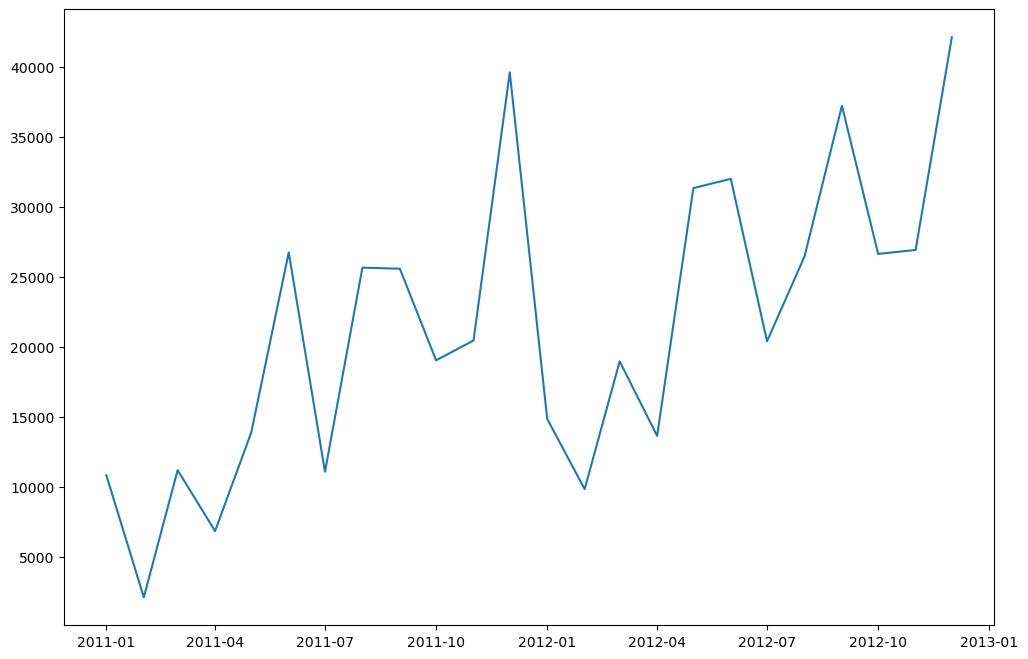

In [42]:
plt.figure(figsize = (12,8))
plt.plot(list(North.index)[:24],North['sales'].loc['2011-01-01':'2012-12-01'])

In [43]:
#result = adfuller(North['seasonal_difference'].iloc[1:])
#type(result)
#for i in result:
#    print(round(i,2))

In [44]:
len(lst),len(lst_6months),len(lst_monthlySeasonal)

(9, 2, 1)

In [45]:
lst,lst_6months,lst_monthlySeasonal

(['Africa',
  'Central',
  'Central_Asia',
  'East',
  'North_Asia',
  'Oceania',
  'South',
  'Southeast_Asia',
  'West'],
 ['Caribbean', 'EMEA'],
 ['North'])

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


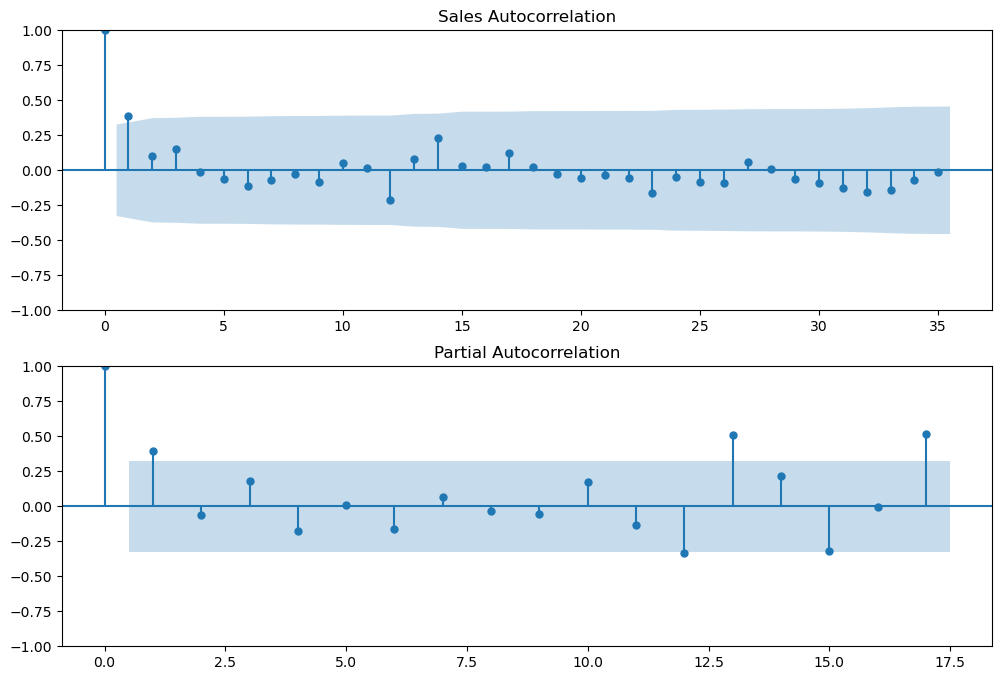

In [46]:
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(monthly_sales_forecast['seasonal_difference'],lags=35,ax=ax1)
plt.title('Sales Autocorrelation')
ax2 = fig.add_subplot(212)
fig = plot_pacf(monthly_sales_forecast['seasonal_difference'],lags=17,ax=ax2)
plt.show()

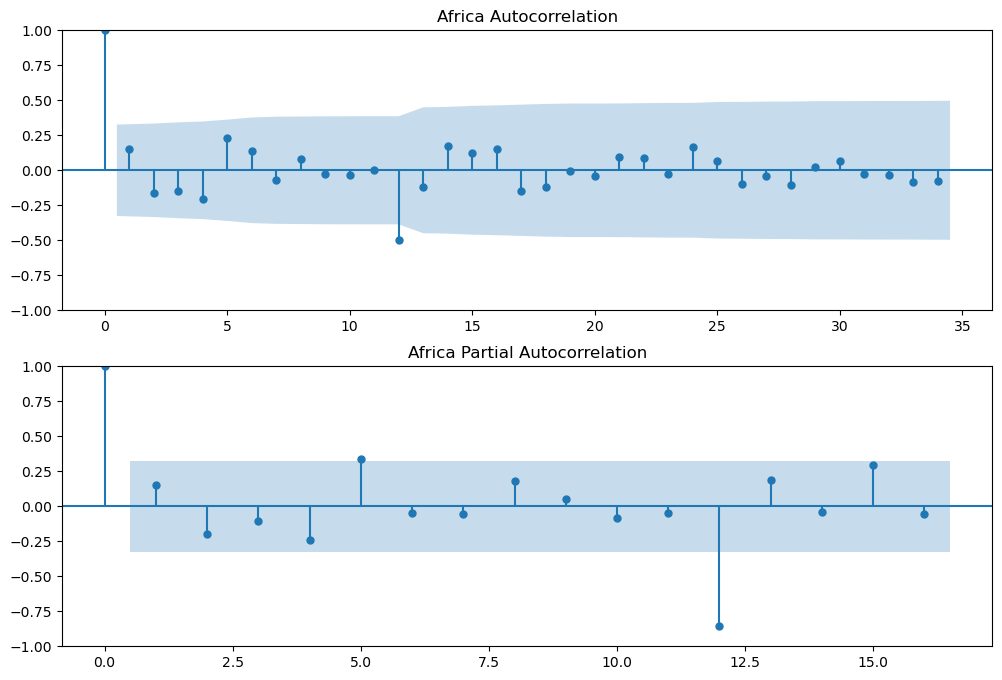

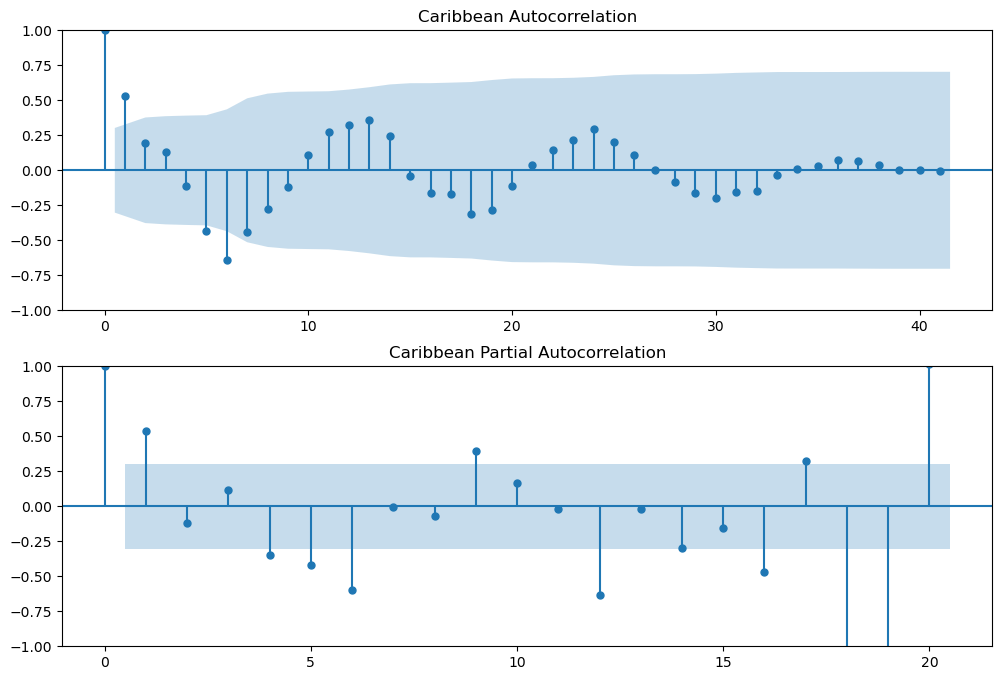

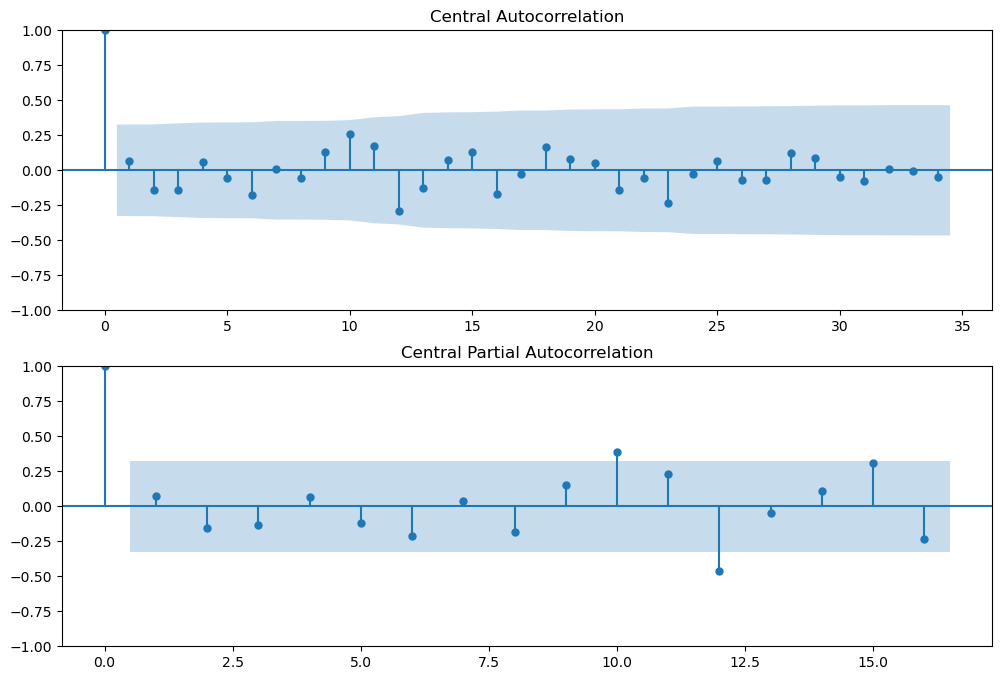

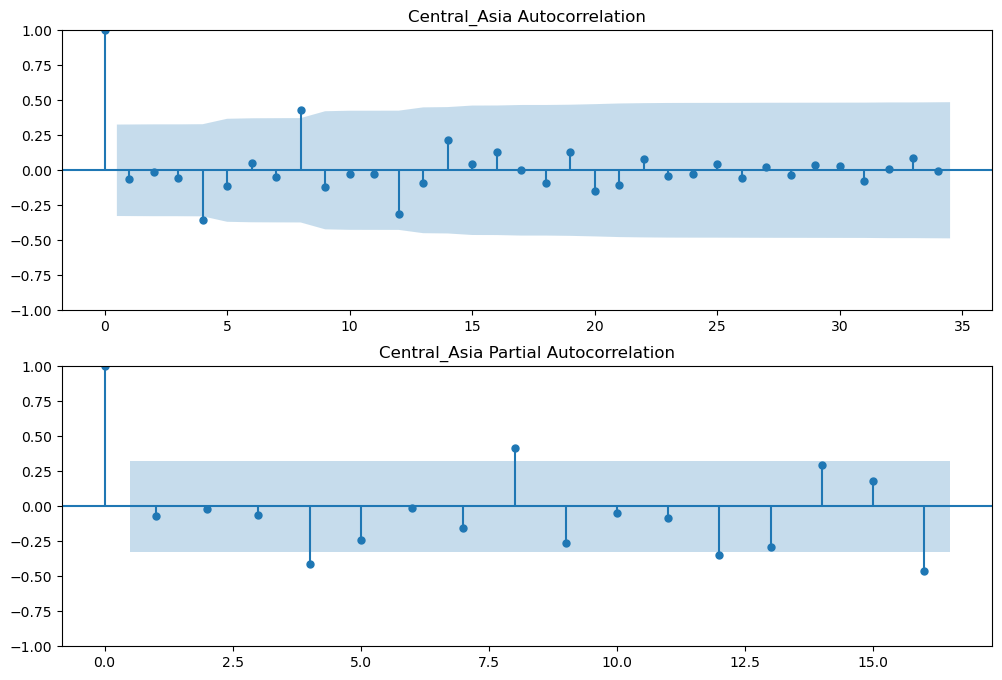

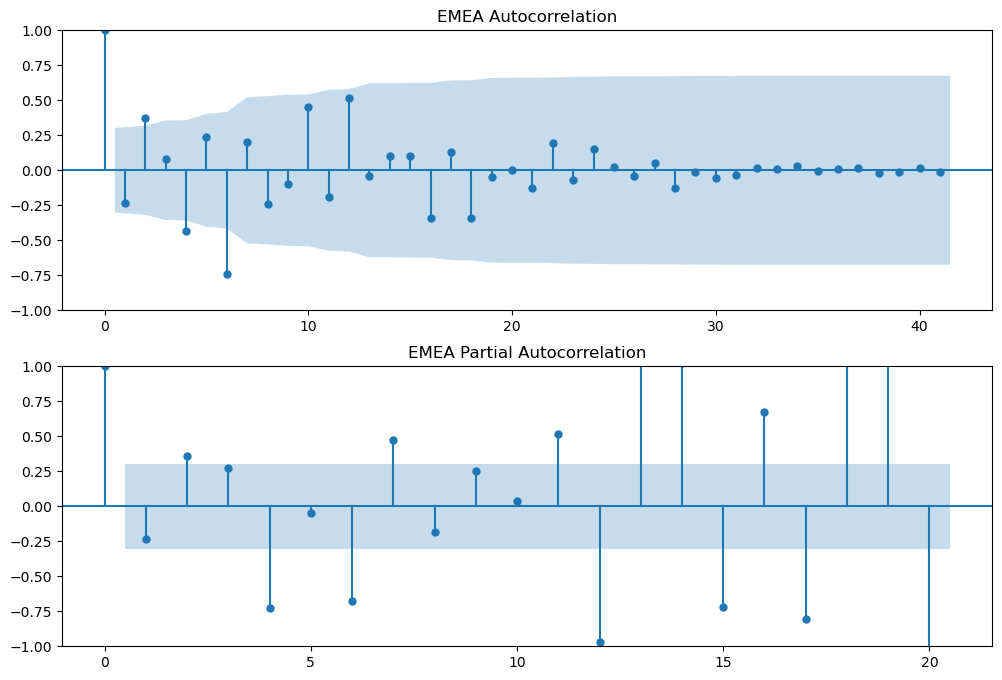

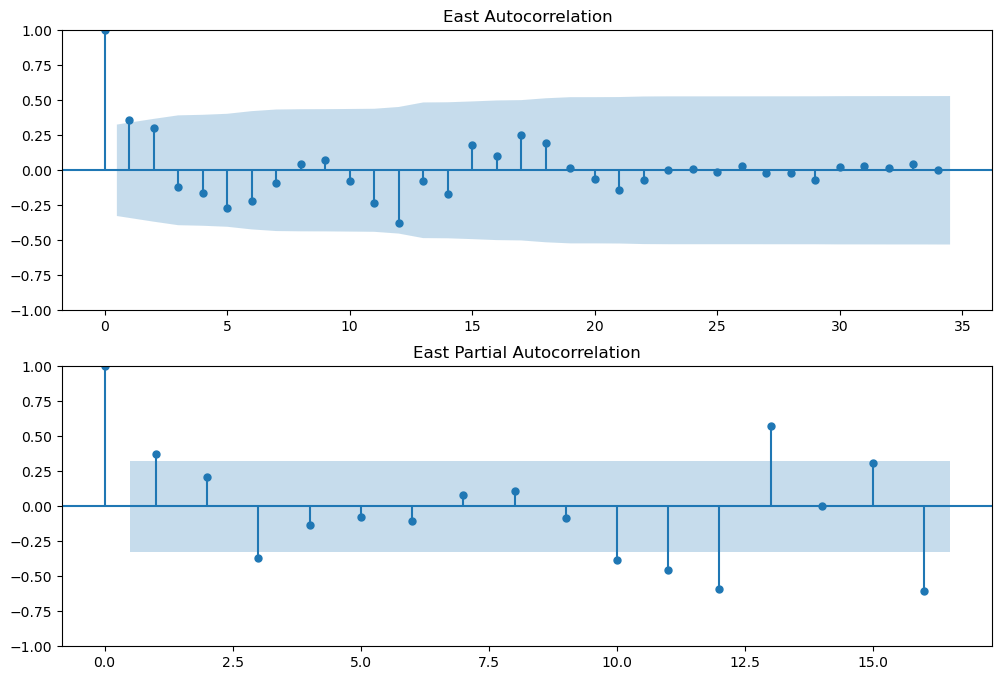

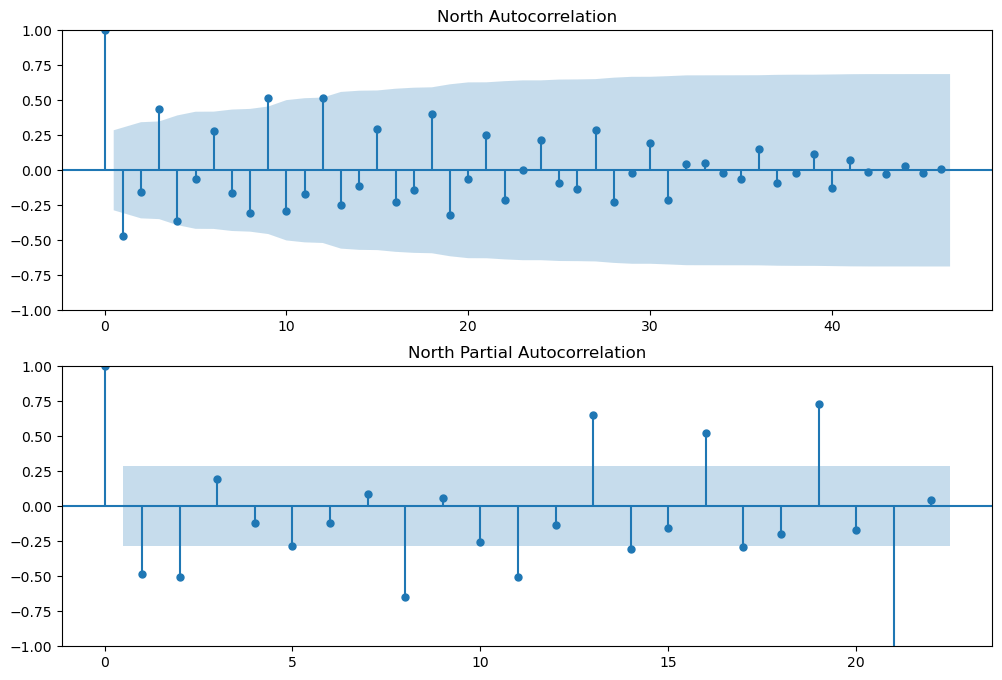

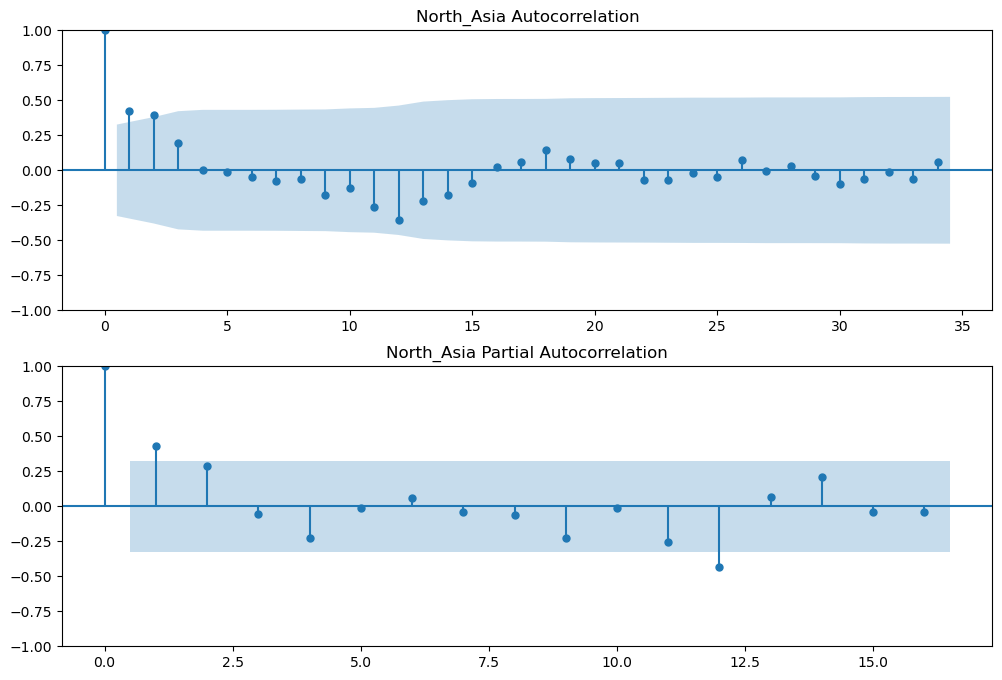

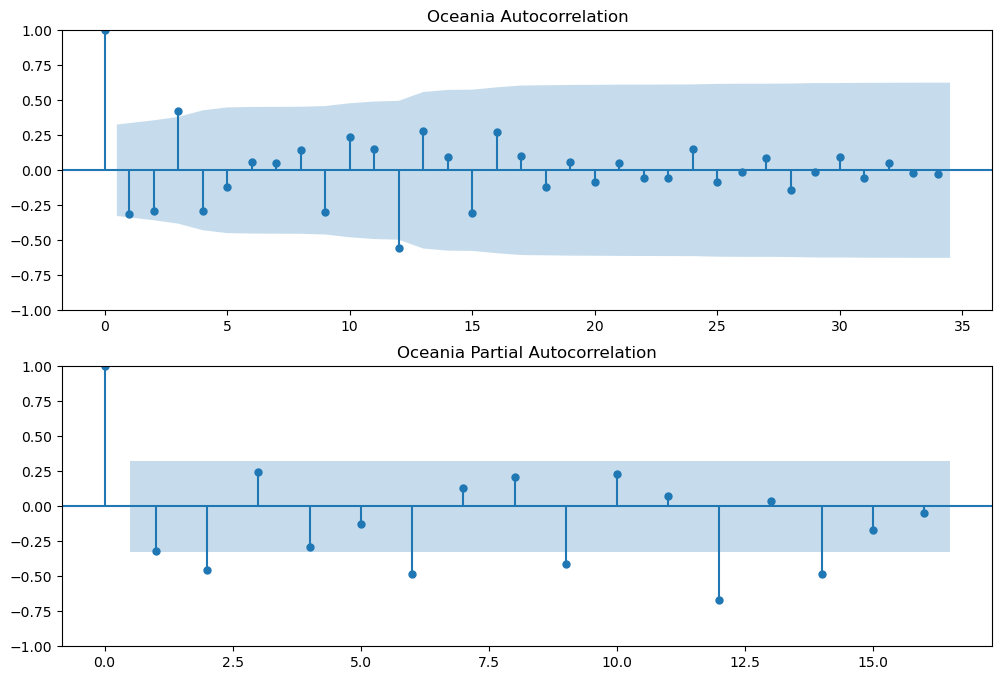

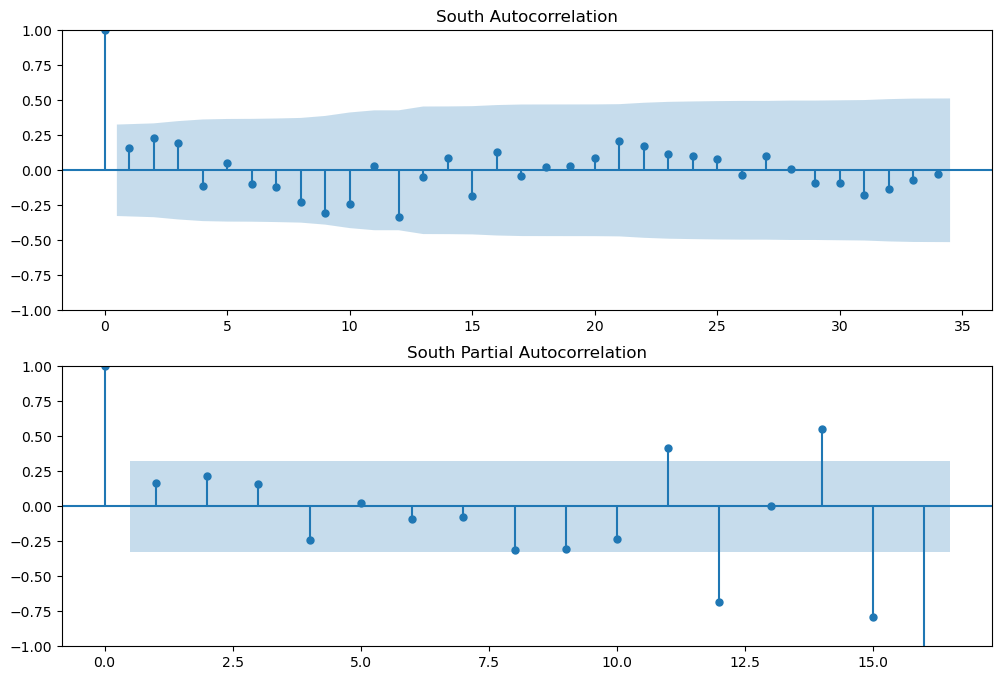

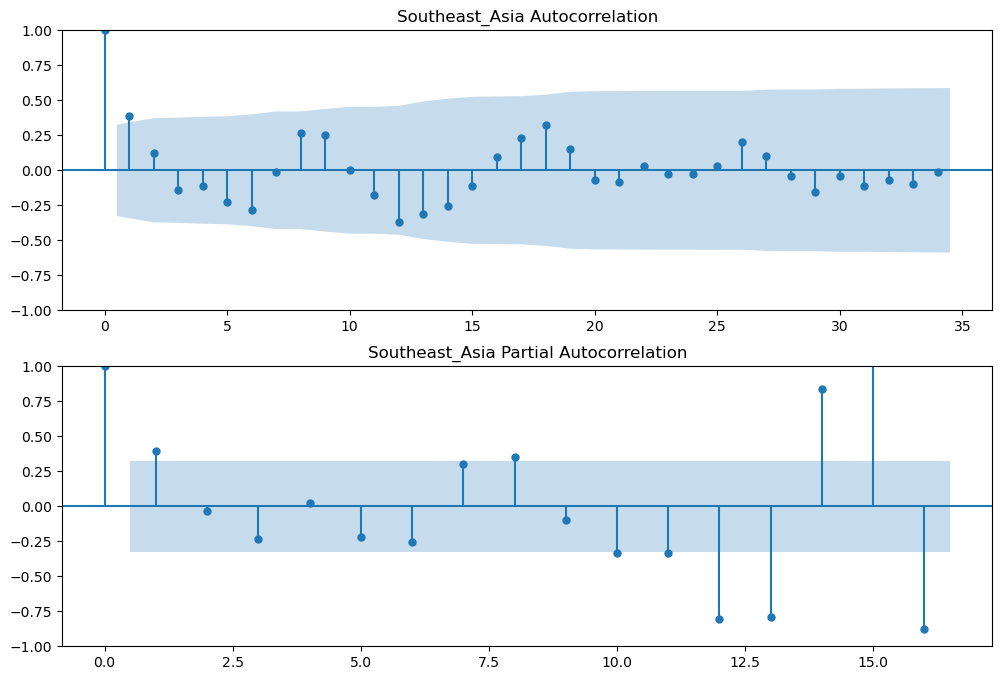

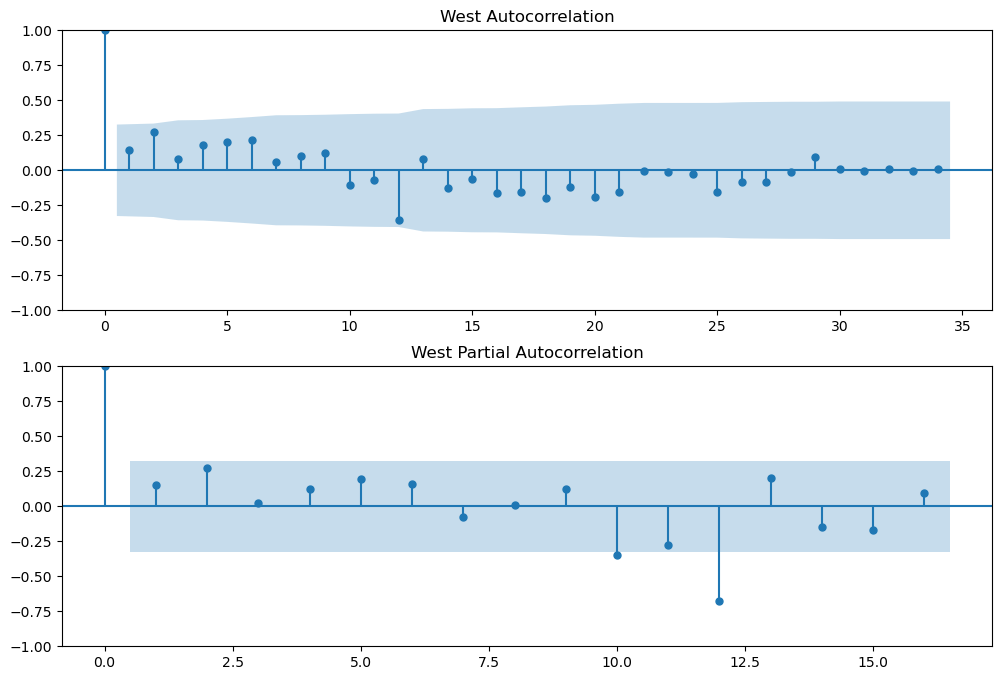

In [47]:
for area in list_of_regions:
    if area.name in lst:
        fig = plt.figure(figsize=(12,8))
        ax1 = fig.add_subplot(211)
        fig = plot_acf(area['seasonal_difference'].iloc[12:],lags=34,ax=ax1)
        plt.title(f'{area.name} Autocorrelation')
        ax2 = fig.add_subplot(212)
        fig = plot_pacf(area['seasonal_difference'].iloc[12:],lags=16,ax=ax2)
        plt.title(f'{area.name} Partial Autocorrelation')
        plt.show()
    elif area.name in lst_6months:
        fig = plt.figure(figsize=(12,8))
        ax1 = fig.add_subplot(211)
        fig = plot_acf(area['seasonal_difference'].iloc[6:],lags=41,ax=ax1)
        plt.title(f'{area.name} Autocorrelation')
        ax2 = fig.add_subplot(212)
        fig = plot_pacf(area['seasonal_difference'].iloc[6:],lags=20,ax=ax2)
        plt.title(f'{area.name} Partial Autocorrelation')
        plt.show()
    elif area.name in lst_monthlySeasonal:
        fig = plt.figure(figsize=(12,8))
        ax1 = fig.add_subplot(211)
        fig = plot_acf(area['seasonal_difference'].iloc[1:],lags=46,ax=ax1)
        plt.title(f'{area.name} Autocorrelation')
        ax2 = fig.add_subplot(212)
        fig = plot_pacf(area['seasonal_difference'].iloc[1:],lags=22,ax=ax2)
        plt.title(f'{area.name} Partial Autocorrelation')
        plt.show()

           Africa  Canada  Caribbean  Central  Central_Asia  EMEA  East  North  North_Asia  Oceania  South  Southeast_Asia  West 

MA lags(q)  0       0         1          0           0         0    1      0       2            0      0        1             0
AR lags(p)  0       0         1          0           0         0    1      0       1            0      0        1             0 
diff(d)     1       1         1          1           1         1    1      1       1            1      1        1             1 
seasonal(s) 12      12        6          12          12        6    12     1       12           12     12       12            12 

In [48]:
Africa.q = 0
Africa.p = 0
Africa.d = 1
Africa.s = 12                                   
#anadian.q = 0                            
#anadian.p = 0                           
#anadian.d = 1                                   
#anadian.s = 12                                    
Caribbean.q = 1
Caribbean.p = 1
Caribbean.d = 1
Caribbean.s = 6
Central.q = 0
Central.p = 0
Central.d = 1
Central.s = 12
Central_Asia.q = 0
Central_Asia.p = 0
Central_Asia.d = 1
Central_Asia.s = 12
EMEA.q = 0
EMEA.p = 0
EMEA.d = 1
EMEA.s = 6
East.q = 1                                                       
East.p = 1
East.d = 1
East.s = 12
North.q = 0
North.p = 0
North.d = 1                                             # East  North  North_Asia  Oceania  South  Southeast_Asia  West
North.s = 1                                              # 1      0       2            0      0        1             0
North_Asia.q = 2                                         # 1      0       1            0      0        1             0   
North_Asia.p = 1                                         # 1      1       1            1      1        1             1
North_Asia.d = 1                                         # 12     1       12           12     12       12            12
North_Asia.s = 12
Oceania.q = 0
Oceania.p = 0
Oceania.d = 1
Oceania.s = 12
South.q = 0
South.p = 0
South.d = 1
South.s = 12
Southeast_Asia.q = 1
Southeast_Asia.p = 1
Southeast_Asia.d = 1
Southeast_Asia.s = 12
West.q = 0
West.p = 0
West.d = 1
West.s = 12

In [49]:
Africa_predicted = pd.DataFrame(index = future_dates)
Africa_predicted.name = 'Africa_predicted'
#Canada_predicted = pd.DataFrame(index = future_dates)
#Canada_predicted.name = 'Canada_predicted'
Caribbean_predicted = pd.DataFrame(index = future_dates)
Caribbean_predicted.name = 'Caribbean_predicted'
Central_predicted = pd.DataFrame(index = future_dates)
Central_predicted.name = 'Central_predicted'
Central_Asia_predicted = pd.DataFrame(index = future_dates)
Central_Asia_predicted.name = 'Central_Asia_predicted'
EMEA_predicted = pd.DataFrame(index = future_dates)
EMEA_predicted.name = 'EMEA_predicted'
East_predicted = pd.DataFrame(index = future_dates)
East_predicted.name = 'East_predicted'
North_predicted = pd.DataFrame(index = future_dates)
North_predicted.name = 'North_predicted'
North_Asia_predicted = pd.DataFrame(index = future_dates)
North_Asia_predicted.name = 'North_Asia_predicted'
Oceania_predicted = pd.DataFrame(index = future_dates)
Oceania_predicted.name = 'Oceania_predicted'
South_predicted = pd.DataFrame(index = future_dates)
South_predicted.name = 'South_predicted'
Southeast_Asia_predicted = pd.DataFrame(index = future_dates)
Southeast_Asia_predicted.name = 'Southeast_Asia_predicted'
West_predicted = pd.DataFrame(index = future_dates)
West_predicted.name = 'West_predicted'

In [50]:
lst_predicted = [Africa_predicted,Caribbean_predicted,Central_predicted,Central_Asia_predicted,EMEA_predicted,East_predicted,North_predicted,North_Asia_predicted,Oceania_predicted,South_predicted,Southeast_Asia_predicted,West_predicted]
len(lst_predicted)

12

In [51]:
for area in list_of_regions:
    print(area.name,':',len(area))


Africa : 48
Caribbean : 48
Central : 48
Central_Asia : 48
EMEA : 48
East : 48
North : 48
North_Asia : 48
Oceania : 48
South : 48
Southeast_Asia : 48
West : 48


In [52]:
#Canada.index
#index1 =  Canada.index
#Canada.index = index1.insert(12, '2012-01-01')
#Canada.index = index1 
#index1


In [53]:
from statsmodels.tsa.arima.model import ARIMA

In [54]:
#import statsmodels.api as sm
for area,reg in zip(lst_predicted,list_of_regions):
    if reg.name in lst or reg.name in lst_6months:
        model = sm.tsa.statespace.SARIMAX(reg['sales'],order = (reg.p,reg.d,reg.q),seasonal_order = (reg.p,reg.d,reg.q,reg.s))
        result = model.fit()
        area['sales'] = result.predict(start = '2015-01-01', end = '2015-12-01', dynamic = True)
    elif reg.name in lst_monthlySeasonal:
        model = ARIMA(reg['sales'],order = (reg.p,reg.d,reg.q))
        result = model.fit()
        area['sales'] = result.predict(start = '2015-01-01', end = '2015-12-01', dynamic = True)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

In [55]:
for area,reg in zip(lst_predicted,list_of_regions):
    print(area.name,':',reg.name)

Africa_predicted : Africa
Caribbean_predicted : Caribbean
Central_predicted : Central
Central_Asia_predicted : Central_Asia
EMEA_predicted : EMEA
East_predicted : East
North_predicted : North
North_Asia_predicted : North_Asia
Oceania_predicted : Oceania
South_predicted : South
Southeast_Asia_predicted : Southeast_Asia
West_predicted : West


In [56]:
for area,reg in zip(list_of_regions,lst_predicted):
    print(area.name,':',reg.name)

Africa : Africa_predicted
Caribbean : Caribbean_predicted
Central : Central_predicted
Central_Asia : Central_Asia_predicted
EMEA : EMEA_predicted
East : East_predicted
North : North_predicted
North_Asia : North_Asia_predicted
Oceania : Oceania_predicted
South : South_predicted
Southeast_Asia : Southeast_Asia_predicted
West : West_predicted


In [57]:
for reg,area in zip(lst_predicted,list_of_regions):
    lst_region = []
    for i in range(len(reg)):
        lst_region.append(area.name)
    reg['Region'] = lst_region
West_predicted    

,sales,Region
2015-01-01,9646.5890,West
2015-02-01,6875.5020,West
2015-03-01,26054.9830,West
2015-04-01,10257.5380,West
2015-05-01,12962.2310,West
2015-06-01,12263.6635,West
2015-07-01,18451.3450,West
2015-08-01,21257.3430,West
2015-09-01,26258.7080,West
2015-10-01,18616.5910,West


In [58]:
for area in lst_predicted:
    print(area.name,end=', ')

Africa_predicted, Caribbean_predicted, Central_predicted, Central_Asia_predicted, EMEA_predicted, East_predicted, North_predicted, North_Asia_predicted, Oceania_predicted, South_predicted, Southeast_Asia_predicted, West_predicted, 

In [59]:
regional_predicted = pd.concat([Africa_predicted, Caribbean_predicted, Central_predicted, Central_Asia_predicted, EMEA_predicted, East_predicted, North_predicted, North_Asia_predicted, Oceania_predicted, South_predicted, Southeast_Asia_predicted, West_predicted])

In [60]:
regional_predicted = regional_predicted.groupby('Region')['sales'].sum()


In [61]:
#Region wise predicted sales
regional_predicted =regional_predicted.round(2)
regional_predicted_sales = pd.DataFrame(regional_predicted)
regional_predicted_sales

,sales
Region,
Africa,362841.35
Caribbean,137625.80
Central,1271099.34
Central_Asia,216601.18
EMEA,472123.26
East,236112.06
North,556378.89
North_Asia,318922.22
Oceania,278780.14


In [62]:
region_sales = region.groupby('region')['sales'].sum()
region_sales = region_sales.round(2)
region_sales = pd.DataFrame(region_sales)
region_sales = region_sales[region_sales.index != 'Canada']
region_sales

,sales
region,
Africa,783773.21
Caribbean,324280.86
Central,2822302.52
Central Asia,752826.57
EMEA,806161.31
East,678781.24
North,1248165.60
North Asia,848309.78
Oceania,1100184.61


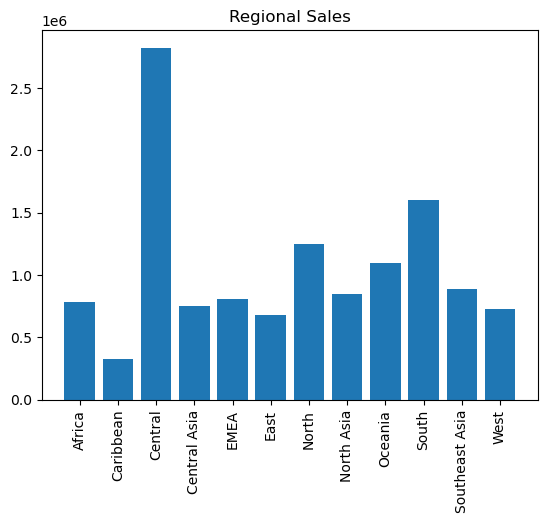

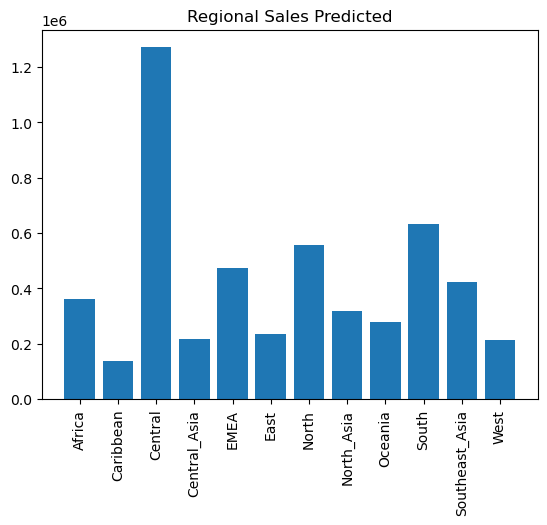

In [63]:
plt.bar(region_sales.index,region_sales['sales'])
plt.xticks(rotation=90)
plt.title('Regional Sales')
plt.show()
plt.bar(regional_predicted_sales.index,regional_predicted_sales['sales'])
plt.xticks(rotation=90)
plt.title('Regional Sales Predicted')
plt.show()

In [64]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [65]:
category = df[['order_date','category','sales']]
category['month_year'] = category['order_date'].apply(extract_month_year)
category

C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\450489655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category['month_year'] = category['order_date'].apply(extract_month_year)


,order_date,category,sales,month_year
0,2011-01-01,Office Supplies,408.300,1-2011
1,2011-01-01,Office Supplies,120.366,1-2011
2,2011-01-01,Office Supplies,66.120,1-2011
3,2011-01-01,Office Supplies,44.865,1-2011
4,2011-01-01,Furniture,113.670,1-2011
...,...,...,...,...
51285,2014-12-31,Office Supplies,13.904,12-2014
51286,2014-12-31,Office Supplies,3.990,12-2014
51287,2014-12-31,Office Supplies,26.400,12-2014
51288,2014-12-31,Office Supplies,7.120,12-2014


In [66]:
category.drop('order_date',axis = 1,inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_20584\2034875102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category.drop('order_date',axis = 1,inplace = True)


In [67]:
category = category.groupby(['category','month_year'])['sales'].sum()
category

category    month_year
Furniture   1-2011         34463.75300
            1-2012         42498.86140
            1-2013         81804.60070
            1-2014         69799.47070
            10-2011        77411.70410
                              ...     
Technology  8-2014        174905.33026
            9-2011         92246.57744
            9-2012        114379.41494
            9-2013        138156.88678
            9-2014        170994.07300
Name: sales, Length: 144, dtype: float64

In [68]:
category = pd.DataFrame(category).reset_index()
category['category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [69]:
category['month_year'] = pd.to_datetime(category['month_year'])

In [70]:
Furniture = category[category['category'] == 'Furniture'][['month_year','sales']]
Furniture.set_index('month_year',inplace = True)
Furniture.sort_index(inplace = True)
Furniture.name = 'Furniture'
Furniture
Office_Supplies = category[category['category'] == 'Office Supplies'][['month_year','sales']]
Office_Supplies.set_index('month_year',inplace = True)
Office_Supplies.sort_index(inplace = True)
Office_Supplies.name = 'Office_Supplies'
Technology = category[category['category'] == 'Technology'][['month_year','sales']]
Technology.set_index('month_year',inplace = True)
Technology.sort_index(inplace = True)
Technology.name = 'Technology'

In [71]:
len(Furniture),len(Office_Supplies),len(Technology)

(48, 48, 48)

In [72]:
category['category'].unique()
lst_category = [Furniture, Office_Supplies, Technology]

In [73]:
Furniture['sales'] = Furniture['sales'].round(2)
Office_Supplies['sales'] = Office_Supplies['sales'].round(2)
Technology['sales'] = Technology['sales'].round(2)

In [74]:
Office_Supplies

,sales
month_year,
2011-01-01,33526.73
2011-02-01,22277.00
2011-03-01,34395.13
2011-04-01,46604.12
2011-05-01,46109.59
2011-06-01,65149.73
2011-07-01,41358.64
2011-08-01,56697.21
2011-09-01,102938.76


In [75]:
#from statsmodels.tsa.stattools import adfuller

lst_stationary_sales=[]
for cat in lst_category:
    results = adfuller(cat['sales'])
    labels = ['ADF TEST STATISTICS','p-value','#LAGS USED','NUMBER OF OBSERVATIONS USED']
    if results[1] <= 0.05:
        lst_stationary_sales.append(cat.name)
lst_stationary_sales

['Technology']

In [76]:
results = adfuller(Technology['sales'])
labels = ['ADF TEST STATISTICS','p-value','#LAGS USED','NUMBER OF OBSERVATIONS USED']
for result,label in zip(results,labels):
    print(label,':',result)

ADF TEST STATISTICS : -2.878448789837508
p-value : 0.04791211932117007
#LAGS USED : 0
NUMBER OF OBSERVATIONS USED : 47


In [77]:
test_list = [Furniture, Office_Supplies]
lst_6months_sales = []
for cat in test_list:
    srs = cat['sales'] - cat['sales'].shift(6)
    results = adfuller(srs.dropna())
    labels = ['ADF TEST STATISTICS','p-value','#LAGS USED','NUMBER OF OBSERVATIONS USED']
    if results[1] <= 0.05:
        lst_6months_sales.append(cat.name)
        cat['seasonal_difference'] = srs
        print(round(results[1],6))
lst_6months_sales

0.0
0.0


['Furniture', 'Office_Supplies']

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


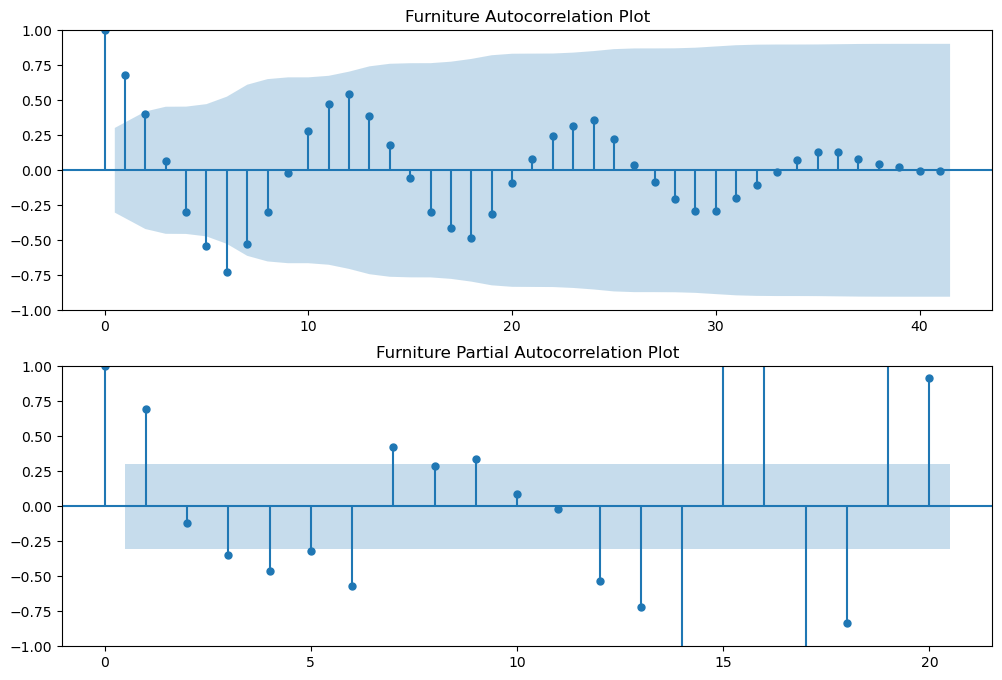

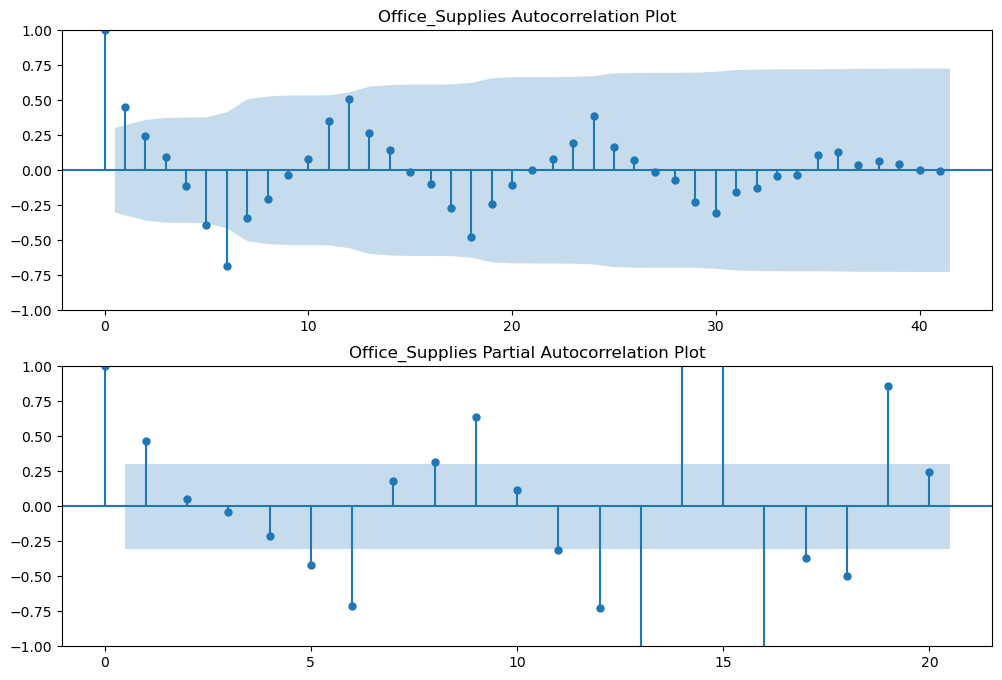

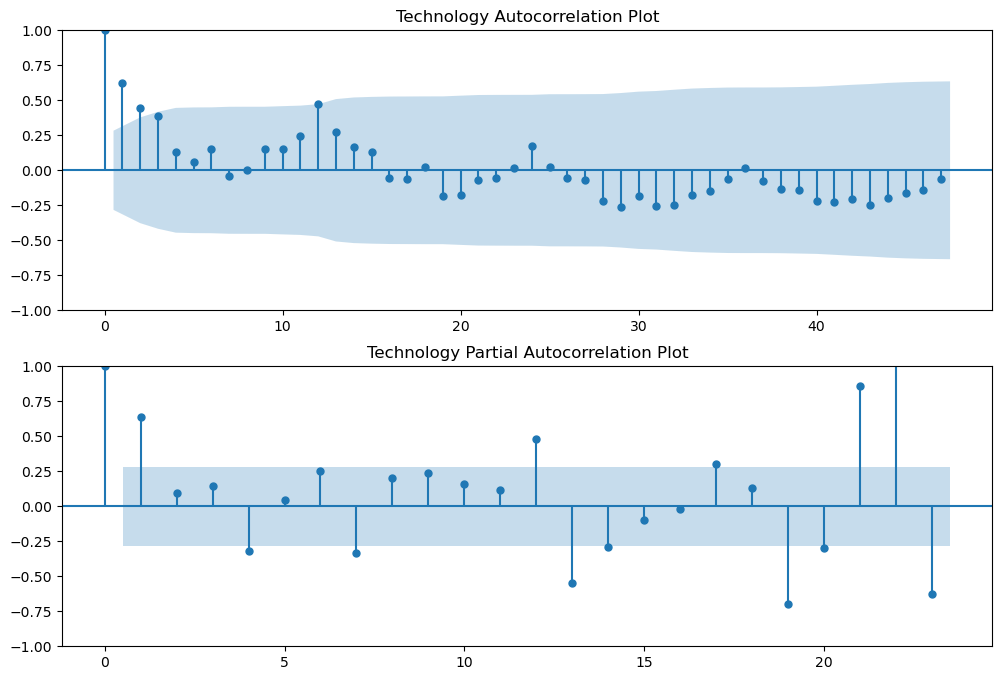

In [78]:
#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
for cat in lst_category:
    if cat.name in lst_6months_sales:
        fig = plt.figure(figsize = (12,8))
        ax1 = fig.add_subplot(211)
        fig = plot_acf(cat['seasonal_difference'].dropna(),lags = 41, ax = ax1)
        plt.title(f'{cat.name} Autocorrelation Plot')
        ax2 = fig.add_subplot(212)
        fig = plot_pacf(cat['seasonal_difference'].dropna(),lags = 20,ax = ax2)
        plt.title(f'{cat.name} Partial Autocorrelation Plot')
        plt.show()
    elif cat.name in lst_stationary_sales:
        fig = plt.figure(figsize = (12,8))
        ax1 = fig.add_subplot(211)
        fig = plot_acf(cat['sales'],lags = 47,ax = ax1)
        plt.title(f'{cat.name} Autocorrelation Plot')
        ax2 = fig.add_subplot(212)
        fig = plot_pacf(cat['sales'],lags = 23, ax = ax2)
        plt.title(f'{cat.name} Partial Autocorrelation Plot')
        plt.show()

           Furniture          Office_Supplies              Technology
p             1                     1                          1
 
d             1                     1                          0

q             1                     1                          2 

s             6                     6                          0  

In [79]:
#Since the ADF test shows that sales data of Technology is stationary we will be using ARMA model
#and for the rest of the categories we will be using SARIMA model
Furniture.p = 1
Furniture.d = 1
Furniture.q = 1
Furniture.s = 6
Office_Supplies.p = 1
Office_Supplies.d = 1
Office_Supplies.q = 1
Office_Supplies.s = 6
Technology.p = 1
Technology.d = 0
Technology.q = 2
Technology.s = 0

In [80]:
Furniture_predicted = pd.DataFrame(index = future_dates)
Furniture_predicted.name = 'Furniture_predicted'
Office_Supplies_predicted = pd.DataFrame(index = future_dates)
Office_Supplies_predicted.name = 'Office_Supplies_predicted'
Technology_predicted = pd.DataFrame(index = future_dates)
Technology_predicted.name = 'Technology_predicted'

In [81]:
cat_lst_pred = [Furniture_predicted,Office_Supplies_predicted,Technology_predicted]

In [82]:
for cat,pred in zip(lst_category,cat_lst_pred):
    print(cat.name,':',pred.name)

Furniture : Furniture_predicted
Office_Supplies : Office_Supplies_predicted
Technology : Technology_predicted


In [83]:
#import statsmodels.api as sm

In [84]:
# sm.tsa.statespace.SARIMAX(reg['sales'],order = (reg.p,reg.d,reg.q),seasonal_order = (reg.p,reg.d,reg.q,reg.s))
for cat,pred in zip(lst_category,cat_lst_pred):
    if cat.name in lst_6months_sales:
        model = sm.tsa.statespace.SARIMAX(cat['sales'],order = (cat.p,cat.d,cat.q),seasonal_order = (cat.p,cat.d,cat.q,cat.s))
        result = model.fit()
        pred['sales'] = result.predict(start = '2015-01-01', end = '2015-12-01', dynamic = True)
    elif cat.name in lst_stationary_sales:
        model = ARIMA(cat['sales'],order = (cat.p,cat.d,cat.q))
        result = model.fit()
        pred['sales'] = result.predict(start = '2015-01-01', end = '2015-12-01', dynamic = True)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self.

In [85]:
for cat,pred in zip(lst_category,cat_lst_pred):
    test_lst = []
    for i in range(len(pred)):
        test_lst.append(cat.name)
    pred['Category'] = test_lst
    pred['sales'].round(2)

In [86]:
Furniture_predicted

,sales,Category
2015-01-01,104923.817363,Furniture
2015-02-01,107569.344408,Furniture
2015-03-01,151354.273702,Furniture
2015-04-01,121196.403399,Furniture
2015-05-01,151759.045544,Furniture
2015-06-01,175375.617287,Furniture
2015-07-01,117853.001055,Furniture
2015-08-01,154316.676529,Furniture
2015-09-01,202288.583079,Furniture
2015-10-01,159144.652286,Furniture


In [87]:
indices = Furniture.index[-12:]
Furniture_forecast = pd.DataFrame(index = indices)
model = sm.tsa.statespace.SARIMAX(Furniture['sales'],order = (1,1,1),seasonal_order = (1,1,1,6))
result = model.fit()
Furniture_forecast['sales'] = result.predict(start = 36, end = 47, dynamic = True)
Furniture_forecast

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,sales
month_year,
2014-01-01,108168.287033
2014-02-01,105054.060194
2014-03-01,114990.795991
2014-04-01,87733.296663
2014-05-01,110659.162961
2014-06-01,152774.024389
2014-07-01,108936.849840
2014-08-01,141546.691934
2014-09-01,155444.555367


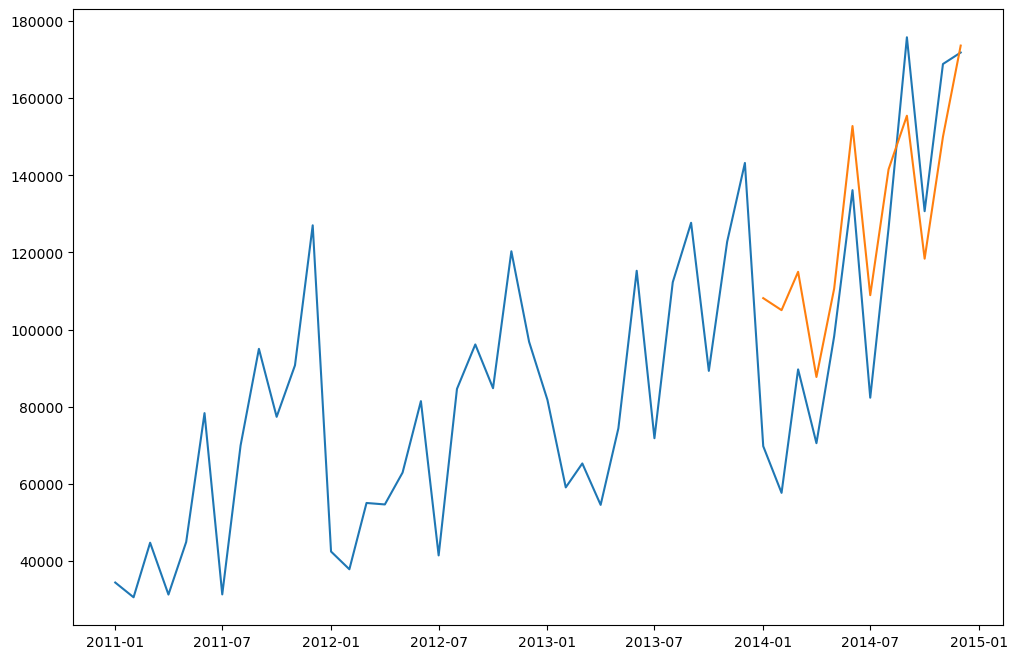

In [88]:
plt.figure(figsize = (12,8))
plt.plot(Furniture.index,Furniture['sales'])
plt.plot(Furniture_forecast.index,Furniture_forecast['sales'])

In [89]:
Technology_forecast = pd.DataFrame(index = indices)
model = ARIMA(cat['sales'],order = (cat.p,cat.d,cat.q))
result = model.fit()
Technology_forecast['sales'] = result.predict(start = 36, end = 47, dynamic = True)
Technology_forecast

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,sales
month_year,
2014-01-01,129366.371447
2014-02-01,125372.656080
2014-03-01,121237.885257
2014-04-01,117747.585101
2014-05-01,114801.304472
2014-06-01,112314.249159
2014-07-01,110214.841498
2014-08-01,108442.660353
2014-09-01,106946.702199


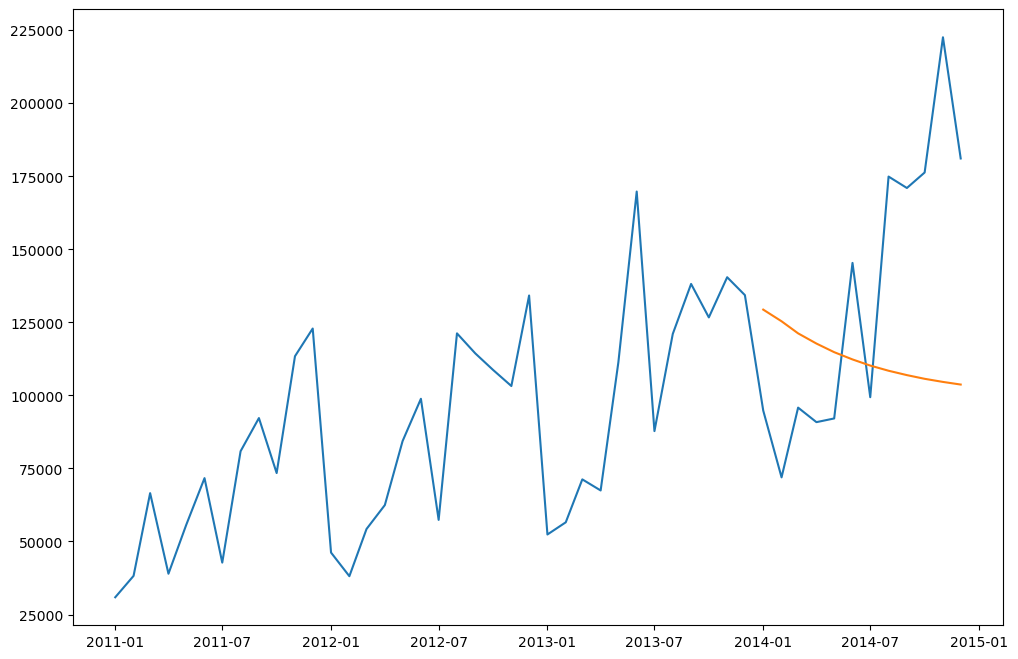

In [90]:
plt.figure(figsize = (12,8))
plt.plot(Technology.index,Technology['sales'])
plt.plot(Technology_forecast.index,Technology_forecast['sales'])

In [91]:
#applying ad-fuller test on technology for six months
srs = Technology['sales'] - Technology['sales'].shift(6)
results = adfuller(srs.dropna())
labels = ['ADF TEST STATISTICS','p-value','#LAGS USED','NUMBER OF OBSERVATIONS USED']
if results[1] <= 0.05:
    print('Data is Stationary')
    Technology['seasonal_difference'] = srs
    print(round(results[1],6))

Data is Stationary
0.00206


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0.5, 1.0, 'Technology Partial Autocorrelation')

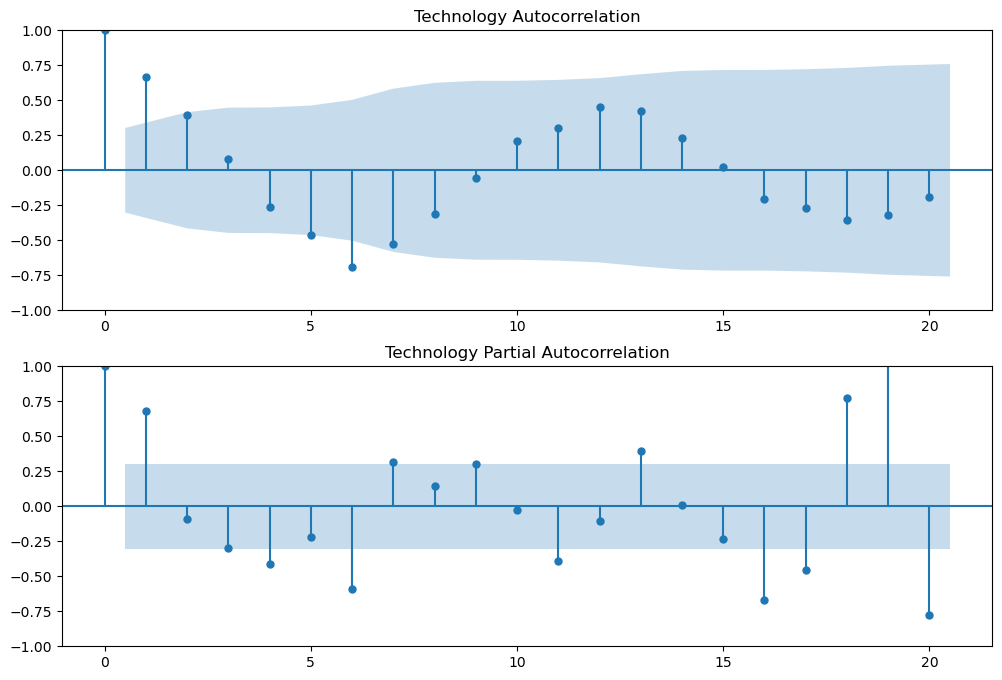

In [92]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Technology['seasonal_difference'].dropna(),lags = 20,ax = ax1)
plt.title('Technology Autocorrelation')
ax2 = fig.add_subplot(212)
fig = plot_pacf(Technology['seasonal_difference'].dropna(),lags = 20,ax = ax2)
plt.title('Technology Partial Autocorrelation')

In [93]:
#clearly here p= 1 ,d = 1 , q = 1, s = 6 

In [94]:
model = sm.tsa.statespace.SARIMAX(Technology['sales'],order = (1,1,1),seasonal_order = (1,1,1,6) )
result = model.fit()
Technology_forecast['sales'] = result.predict(start = 36, end = 47, dynamic = True)
Technology_forecast

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,sales
month_year,
2014-01-01,68308.915340
2014-02-01,89317.698607
2014-03-01,104291.189473
2014-04-01,101011.375900
2014-05-01,134669.835629
2014-06-01,180273.310386
2014-07-01,101686.708137
2014-08-01,130195.039001
2014-09-01,146161.263087


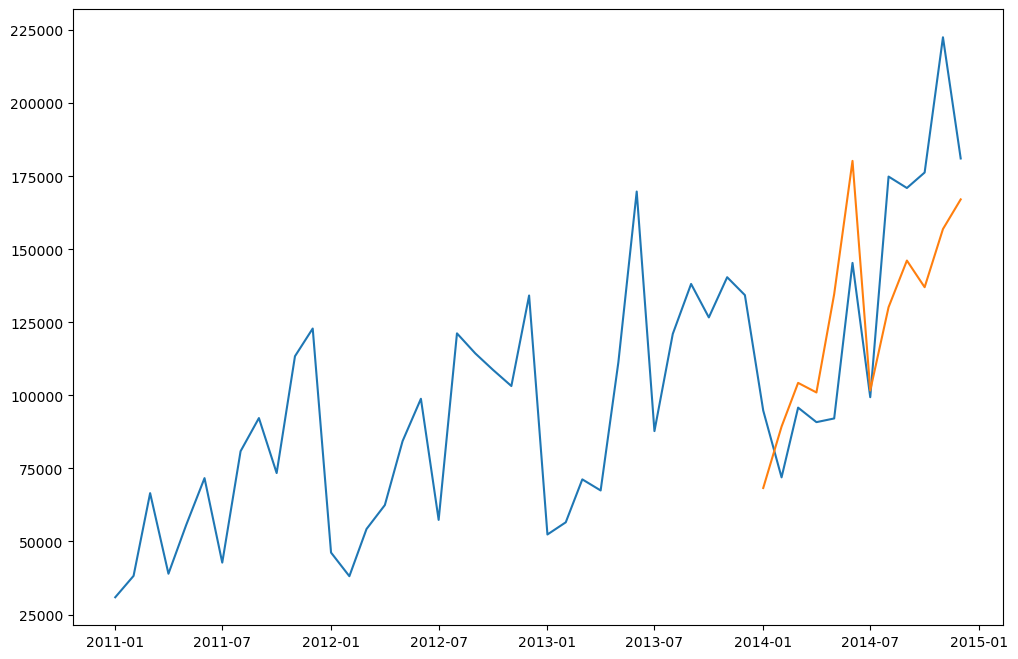

In [95]:
plt.figure(figsize = (12,8))
plt.plot(Technology.index,Technology['sales'])
plt.plot(Technology_forecast.index,Technology_forecast['sales'])

In [96]:
#clearly for Technology category the seasonal data seems to be more fit
# therefore we change the predictions for technology category

In [97]:
model = sm.tsa.statespace.SARIMAX(Technology['sales'],order = (1,1,1),seasonal_order = (1,1,1,6) )
result = model.fit()
Technology_predicted['sales'] = result.predict(start = '2015-01-01', end = '2015-12-01', dynamic = True)
Technology_predicted

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,sales,Category
2015-01-01,132406.815154,Technology
2015-02-01,129813.837127,Technology
2015-03-01,148431.855644,Technology
2015-04-01,143685.496198,Technology
2015-05-01,153267.199029,Technology
2015-06-01,186478.217135,Technology
2015-07-01,139910.807532,Technology
2015-08-01,190878.101641,Technology
2015-09-01,194160.496394,Technology
2015-10-01,196325.172303,Technology


In [98]:
Office_forecast = pd.DataFrame(index = indices)
model = sm.tsa.statespace.SARIMAX(Office_Supplies['sales'],order = (1,1,1),seasonal_order = (1,1,1,6) )
result = model.fit()
Office_forecast['sales'] = result.predict(start = 36, end = 47, dynamic = True)
Office_forecast

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,sales
month_year,
2014-01-01,84841.312879
2014-02-01,82297.729052
2014-03-01,90208.523557
2014-04-01,80037.642803
2014-05-01,102781.252271
2014-06-01,133833.546310
2014-07-01,92620.263237
2014-08-01,109454.197042
2014-09-01,124792.285160


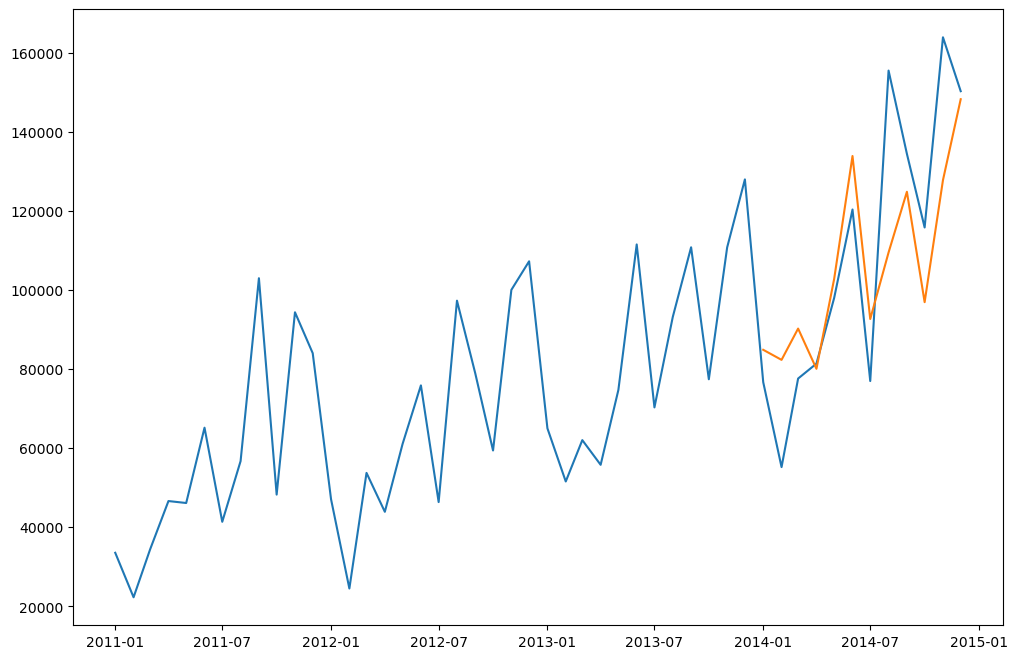

In [99]:
plt.figure(figsize = (12,8))
plt.plot(Office_Supplies.index,Office_Supplies['sales'])
plt.plot(Office_forecast.index,Office_forecast['sales'])

In [100]:
category_predicted = pd.concat([Furniture_predicted,Office_Supplies_predicted,Technology_predicted])

In [101]:
category_predicted['sales'] = category_predicted['sales'].round(2)
category_predicted

,sales,Category
2015-01-01,104923.82,Furniture
2015-02-01,107569.34,Furniture
2015-03-01,151354.27,Furniture
2015-04-01,121196.40,Furniture
2015-05-01,151759.05,Furniture
2015-06-01,175375.62,Furniture
2015-07-01,117853.00,Furniture
2015-08-01,154316.68,Furniture
2015-09-01,202288.58,Furniture
2015-10-01,159144.65,Furniture


In [102]:
category

,category,month_year,sales
0,Furniture,2011-01-01,34463.75300
1,Furniture,2012-01-01,42498.86140
2,Furniture,2013-01-01,81804.60070
3,Furniture,2014-01-01,69799.47070
4,Furniture,2011-10-01,77411.70410
...,...,...,...
139,Technology,2014-08-01,174905.33026
140,Technology,2011-09-01,92246.57744
141,Technology,2012-09-01,114379.41494
142,Technology,2013-09-01,138156.88678


In [103]:
category_sales = category.groupby('category')['sales'].sum().round(2)
category_sales

category
Furniture          4110874.19
Office Supplies    3787070.23
Technology         4744557.50
Name: sales, dtype: float64

Text(0.5, 1.0, 'Category Wise Sales')

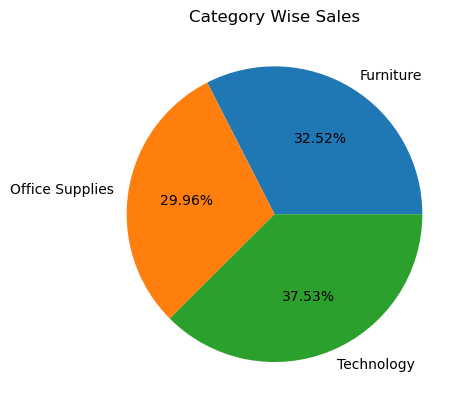

In [104]:
plt.pie(category_sales,labels = ['Furniture','Office Supplies','Technology'], autopct = '%1.2f%%')
plt.title('Category Wise Sales')

In [105]:
def quarter_year(x):
    import math
    quart = math.ceil(x.month/3)
    quart_year = str(x.year) + '-' + str(quart)
    return quart_year 

In [106]:
t = '2011-01-01'
t = datetime.datetime.strptime(t,'%Y-%m-%d')
t.month

1

In [107]:
category_quarterly_sales = category.copy()
category_quarterly_sales['quarters'] = category_quarterly_sales['month_year'].apply(quarter_year)
category_quarterly_sales = category_quarterly_sales.groupby(['category','quarters','month_year'])['sales'].sum()
category_quarterly_sales = pd.DataFrame(category_quarterly_sales).reset_index()
category_quarterly_sales.sort_values(['category','month_year'],inplace = True) 
category_quarterly_sales

,category,quarters,month_year,sales
0,Furniture,2011-1,2011-01-01,34463.75300
1,Furniture,2011-1,2011-02-01,30641.20350
2,Furniture,2011-1,2011-03-01,44780.13880
3,Furniture,2011-2,2011-04-01,31344.86510
4,Furniture,2011-2,2011-05-01,44980.66830
...,...,...,...,...
139,Technology,2014-3,2014-08-01,174905.33026
140,Technology,2014-3,2014-09-01,170994.07300
141,Technology,2014-4,2014-10-01,176294.52436
142,Technology,2014-4,2014-11-01,222579.03730


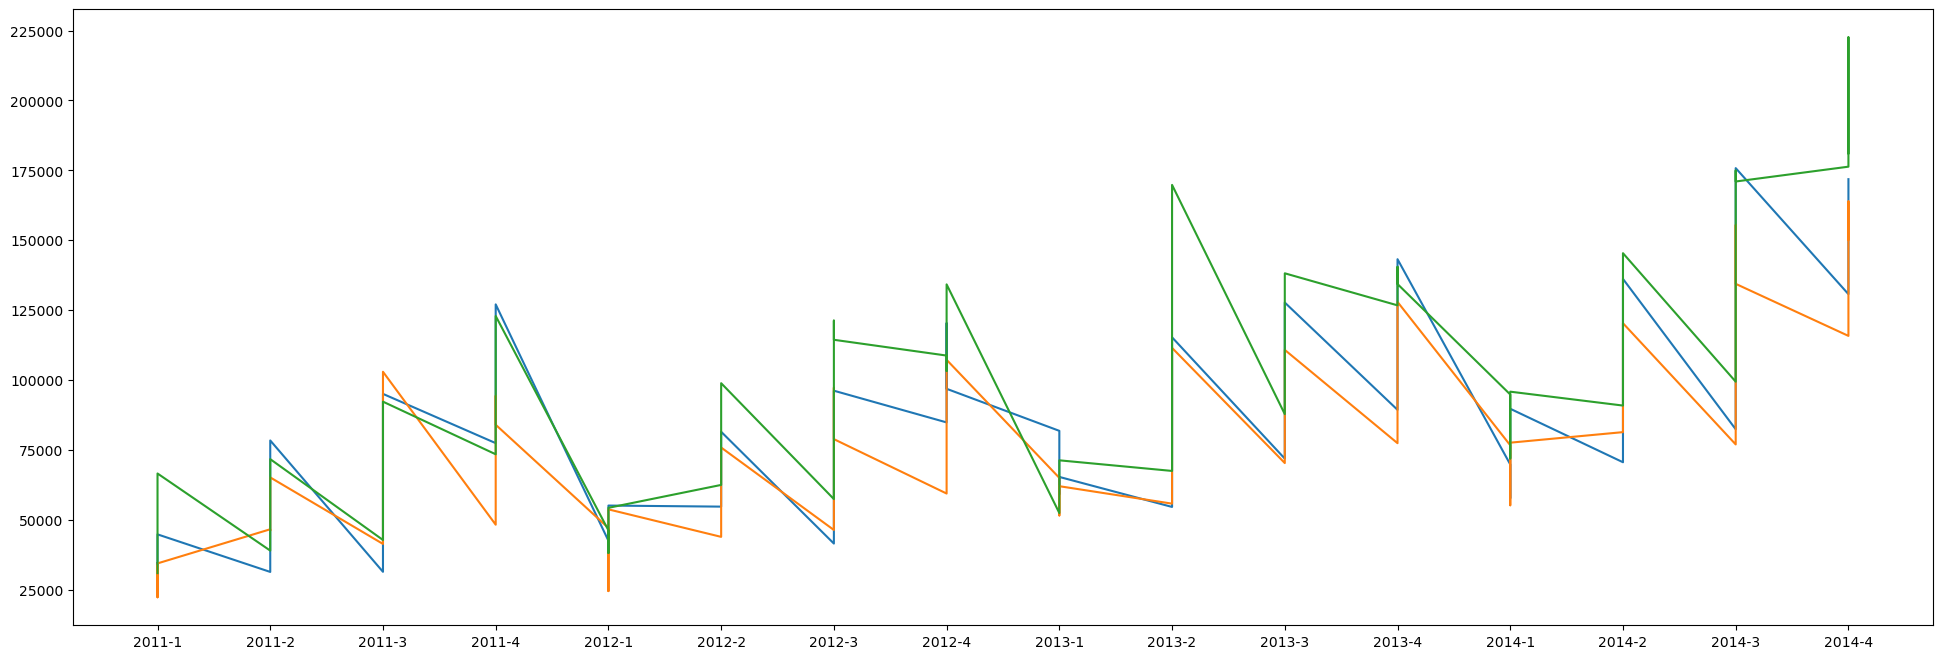

In [108]:
plt.figure(figsize=(24,8))
plt.plot(category_quarterly_sales[category_quarterly_sales['category']=='Furniture']['quarters'],category_quarterly_sales[category_quarterly_sales['category']=='Furniture']['sales'])
plt.plot(category_quarterly_sales[category_quarterly_sales['category']=='Office Supplies']['quarters'],category_quarterly_sales[category_quarterly_sales['category']=='Office Supplies']['sales'])
plt.plot(category_quarterly_sales[category_quarterly_sales['category']=='Technology']['quarters'],category_quarterly_sales[category_quarterly_sales['category']=='Technology']['sales'])

In [109]:
category_predicted_quarterly = category_predicted.copy()
category_predicted_quarterly.reset_index(inplace = True)
category_predicted_quarterly.rename(columns = {'index':'month_year','Category':'category'},inplace = True)
category_predicted_quarterly
category_predicted_quarterly['quarters'] = category_predicted_quarterly['month_year'].apply(quarter_year)
category_predicted_quarterly = category_predicted_quarterly.groupby(['category','quarters','month_year'])['sales'].sum()
category_predicted_quarterly = pd.DataFrame(category_predicted_quarterly).reset_index()
category_predicted_quarterly

,category,quarters,month_year,sales
0,Furniture,2015-1,2015-01-01,104923.82
1,Furniture,2015-1,2015-02-01,107569.34
2,Furniture,2015-1,2015-03-01,151354.27
3,Furniture,2015-2,2015-04-01,121196.40
4,Furniture,2015-2,2015-05-01,151759.05
5,Furniture,2015-2,2015-06-01,175375.62
6,Furniture,2015-3,2015-07-01,117853.00
7,Furniture,2015-3,2015-08-01,154316.68
8,Furniture,2015-3,2015-09-01,202288.58
9,Furniture,2015-4,2015-10-01,159144.65


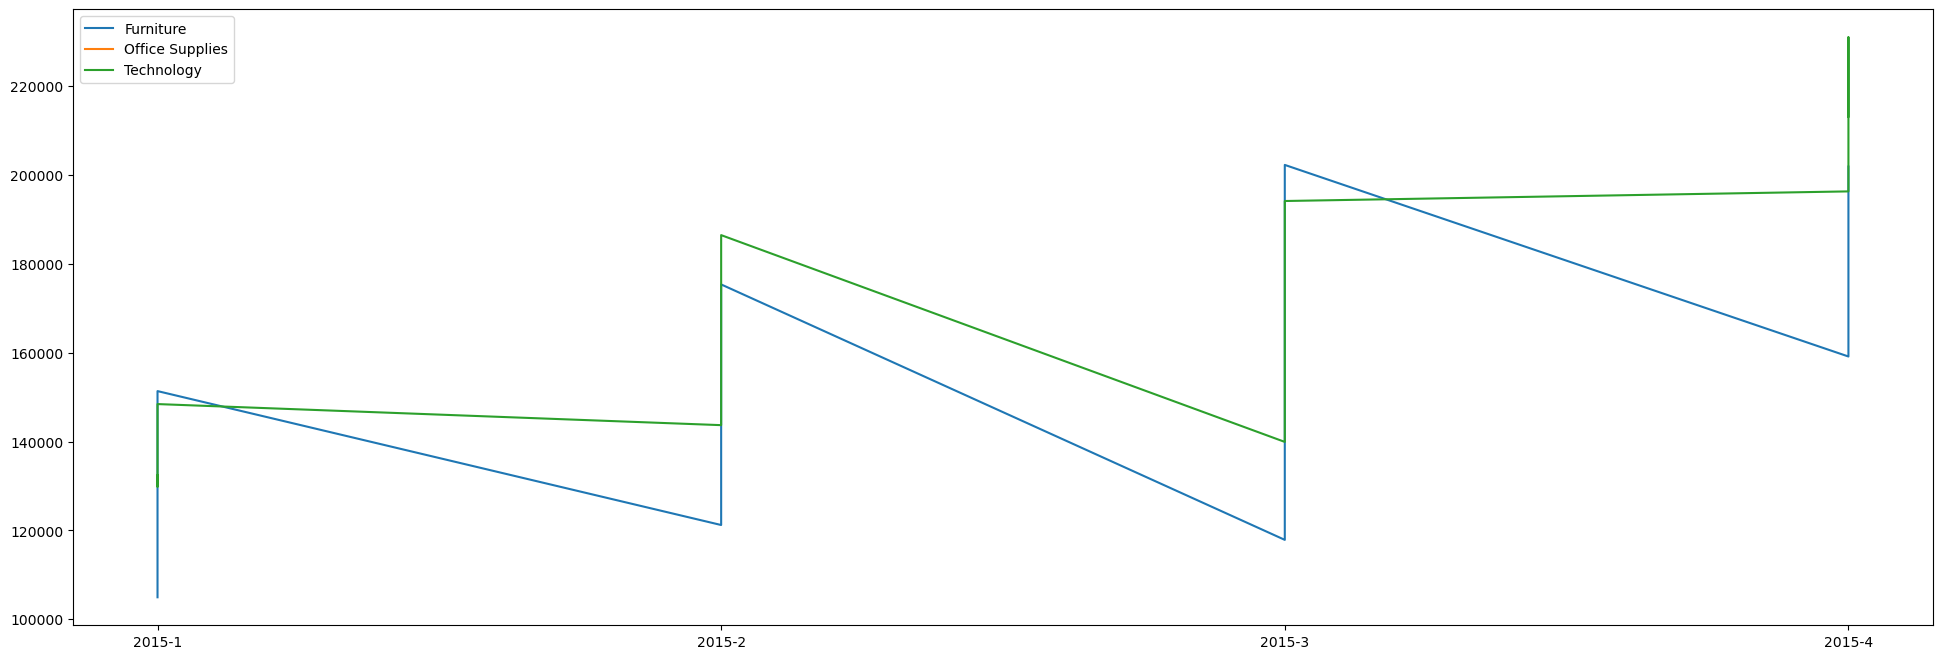

In [110]:
plt.figure(figsize=(24,8))
plt.plot(category_predicted_quarterly[category_predicted_quarterly['category']=='Furniture']['quarters'],category_predicted_quarterly[category_predicted_quarterly['category']=='Furniture']['sales'],label = 'Furniture')
plt.plot(category_predicted_quarterly[category_predicted_quarterly['category']=='Office Supplies']['quarters'],category_predicted_quarterly[category_predicted_quarterly['category']=='Office Supplies']['sales'],label = 'Office Supplies')
plt.plot(category_predicted_quarterly[category_predicted_quarterly['category']=='Technology']['quarters'],category_predicted_quarterly[category_predicted_quarterly['category']=='Technology']['sales'],label = 'Technology')
plt.legend()

In [111]:
category_profit = df[['category','profit']]
category_profit = category_profit.groupby('category')['profit'].sum()
category_profit = pd.DataFrame(category_profit)
category_profit

,profit
category,
Furniture,286782.25380
Office Supplies,518473.83430
Technology,663778.73318


Text(0.5, 1.0, 'Category Wise Profit')

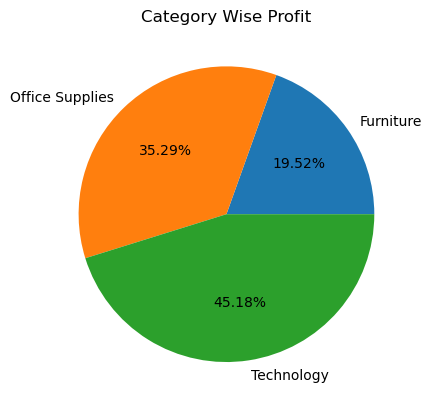

In [112]:
plt.pie(category_profit['profit'],labels = ['Furniture','Office Supplies','Technology'], autopct = '%1.2f%%')
plt.title('Category Wise Profit')

In [113]:
sub_category_profit = df[['category','sub_category','profit']]
sub_category_profit = sub_category_profit.groupby(['category','sub_category'])['profit'].sum()
sub_category_profit = pd.DataFrame(sub_category_profit).reset_index()
sub_category_profit

,category,sub_category,profit
0,Furniture,Bookcases,161924.41950
1,Furniture,Chairs,141973.79750
2,Furniture,Furnishings,46967.42550
3,Furniture,Tables,-64083.38870
4,Office Supplies,Appliances,141680.58940
5,Office Supplies,Art,57953.91090
6,Office Supplies,Binders,72449.84600
7,Office Supplies,Envelopes,29601.11630
8,Office Supplies,Fasteners,11525.42410
9,Office Supplies,Labels,15010.51200


Text(0.5, 1.0, 'Sub-Category Wise Profit')

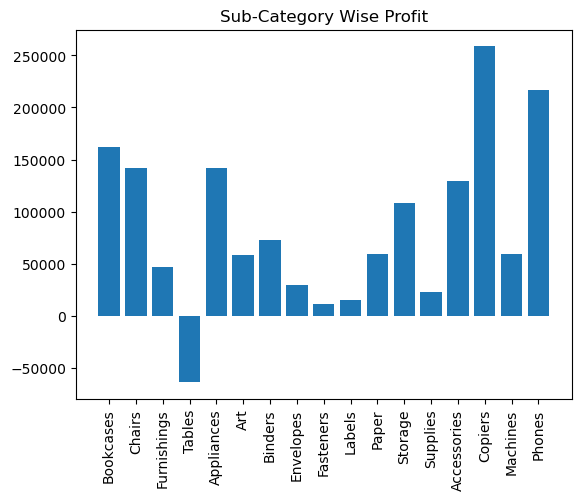

In [114]:
plt.bar(sub_category_profit['sub_category'],sub_category_profit['profit'])
plt.xticks(rotation = 90)
plt.title('Sub-Category Wise Profit')

In [115]:
sales_toppers = df[['category','product_name','sales']]
sales_toppers = sales_toppers.groupby(['category','product_name'])['sales'].sum()
sales_toppers = pd.DataFrame(sales_toppers).reset_index()
lst_index = [x for x in range(10)]
sales_toppers = sales_toppers.sort_values('sales',ascending = False).head(10)
sales_toppers.index = lst_index
sales_toppers

,category,product_name,sales
0,Technology,"Apple Smart Phone, Full Size",86935.7786
1,Technology,"Cisco Smart Phone, Full Size",76441.5306
2,Technology,"Motorola Smart Phone, Full Size",73156.3030
3,Technology,"Nokia Smart Phone, Full Size",71904.5555
4,Technology,Canon imageCLASS 2200 Advanced Copier,61599.8240
5,Furniture,"Hon Executive Leather Armchair, Adjustable",58193.4841
6,Furniture,"Office Star Executive Leather Armchair, Adjust...",50661.6840
7,Furniture,"Harbour Creations Executive Leather Armchair, ...",50121.5160
8,Technology,"Samsung Smart Phone, Cordless",48653.4600
9,Technology,"Nokia Smart Phone, with Caller ID",47877.7857


Text(0.5, 1.0, 'Sales Toppers')

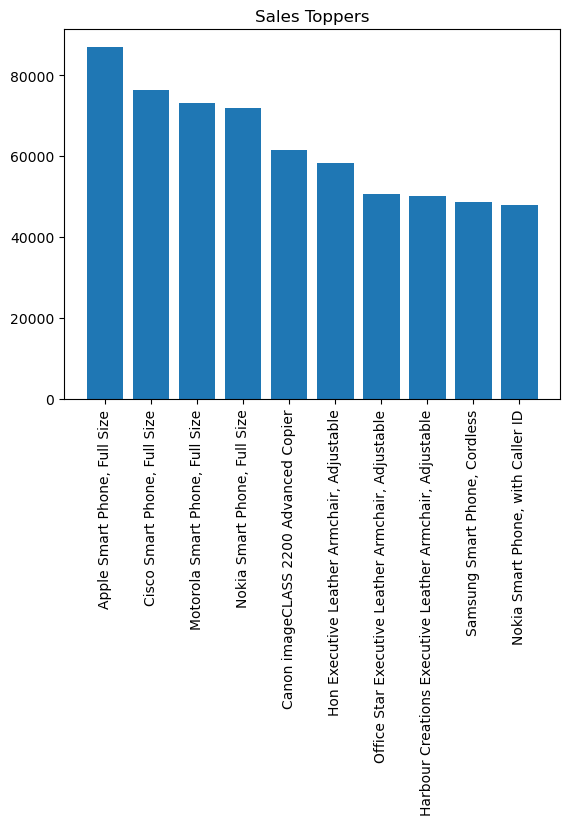

In [116]:
plt.bar(sales_toppers['product_name'],sales_toppers['sales'])
plt.xticks(rotation = 90)
plt.title('Sales Toppers')

In [117]:
monthly_sales['month_year'] = pd.to_datetime(monthly_sales['month_year'])
monthly_sales['quarters'] = monthly_sales['month_year'].apply(quarter_year)
quaterly_sales = monthly_sales.groupby('quarters')['sales'].sum()
quaterly_sales = pd.DataFrame(quaterly_sales).reset_index()
quaterly_sales

,quarters,sales
0,2011-1,335780.02
1,2011-2,478870.98
2,2011-3,613306.37
3,2011-4,831493.53
4,2012-1,399367.71
5,2012-2,625592.86
6,2012-3,737768.90
7,2012-4,914709.24
8,2013-1,565019.59
9,2013-2,834839.49


In [118]:
sales_predicted = df_predicted.copy()
sales_predicted

,sales
2015-01-01,393988.87
2015-02-01,332906.39
2015-03-01,387197.23
2015-04-01,358341.24
2015-05-01,410806.96
2015-06-01,531701.49
2015-07-01,375702.73
2015-08-01,538954.17
2015-09-01,573590.35
2015-10-01,503457.67


In [119]:
country_sales = df[['region','country','sales']]
country_sales = country_sales[country_sales['region'] != 'Canada']
country_sales = country_sales.groupby(['region','country'])['sales'].sum()
country_sales = pd.DataFrame(country_sales).reset_index()
country_sales

,region,country,sales
0,Africa,Algeria,36091.5900
1,Africa,Angola,25554.0000
2,Africa,Benin,6212.0700
3,Africa,Burundi,267.7200
4,Africa,Cameroon,22349.3700
...,...,...,...
146,Southeast Asia,Philippines,183420.1650
147,Southeast Asia,Singapore,40286.2500
148,Southeast Asia,Thailand,77051.9550
149,Southeast Asia,Vietnam,65800.1994


In [120]:
# Tables to be exported to MS. EXCEL:-
# quaterly_sales
# sales_predicted
# region_sales
# regional_predicted_sales
# category_quarterly_sales
# category_predicted
# category_profit
# sub_category_profit
# sales_toppers
# country_sales

In [121]:
lst_sheets = ['Quaterly Sales','Sales Predicted','Regional Sales','Regional predicted Sales','Category Quaterly Sales','Category Predicted Sales','Category Profit','Sub-Category Profit','Sales Toppers','Country Sales']
len(lst_sheets)

10

from openpyxl import load_workbook
for name in lst_sheets:
    wb = load_workbook(r"C:\Users\Dell\Documents\Tableau Dashboards\Super-Store-Sales.xlsx")
    wb.create_sheet(name)
    wb.save(r"C:\Users\Dell\Documents\Tableau Dashboards\Super-Store-Sales.xlsx")
    

In [122]:
with pd.ExcelWriter(r"C:\Users\Dell\Documents\Tableau Dashboards\Super-Store-Sales.xlsx") as writer:
    quaterly_sales.to_excel(writer,sheet_name = 'Quaterly Sales')
    sales_predicted.to_excel(writer,sheet_name = 'Sales Predicted')
    region_sales.to_excel(writer,sheet_name = 'Regional Sales')
    regional_predicted_sales.to_excel(writer,sheet_name = 'Regional predicted Sales')
    category_quarterly_sales.to_excel(writer,sheet_name = 'Category Quaterly Sales')
    category_predicted.to_excel(writer,sheet_name = 'Category Predicted Sales')
    category_profit.to_excel(writer,sheet_name = 'Category Profit')
    sub_category_profit.to_excel(writer,sheet_name = 'Sub-Category Profit')
    sales_toppers.to_excel(writer,sheet_name = 'Sales Toppers')
    country_sales.to_excel(writer,sheet_name = 'country_sales')
    monthly_sales_regional.to_excel(writer,sheet_name = 'Quaterly Sales 2')

In [123]:
#quaterly_sales.to_excel(writer,sheet_name = 'Quaterly Sales')

In [124]:
#sales_predicted.to_excel(writer,sheet_name = 'Sales Predicted')

with pd.ExcelWriter(r"C:\Users\Dell\Documents\Tableau Dashboards\Super-Store-Sales.xlsx") as writer:
    monthly_sales.to_excel(writer,sheet_name = 'Quaterly Sales 2')

In [125]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014


In [126]:
df[['category','product_name','sales']]

,category,product_name,sales
0,Office Supplies,"Tenex Lockers, Blue",408.300
1,Office Supplies,"Acme Trimmer, High Speed",120.366
2,Office Supplies,"Tenex Box, Single Width",66.120
3,Office Supplies,"Enermax Note Cards, Premium",44.865
4,Furniture,"Eldon Light Bulb, Duo Pack",113.670
...,...,...,...
51285,Office Supplies,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904
51286,Office Supplies,"Wilson Jones Hole Reinforcements, Clear",3.990
51287,Office Supplies,"Hon Color Coded Labels, 5000 Label Set",26.400
51288,Office Supplies,"Hon Legal Exhibit Labels, Alphabetical",7.120
